In [1]:
%matplotlib inline
from __future__ import print_function, division

import os, sys, glob
import collections 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(context="poster", style="ticks", font_scale=2)

## Boilerplate path hack to give access to full clustered_SNe package
import sys, os
if __package__ is None:
    if os.pardir not in sys.path[0]:
        file_dir = os.getcwd()
        sys.path.insert(0, os.path.join(file_dir, 
                                        os.pardir, 
                                        os.pardir))
        
from clustered_SNe import data_dir_default
from clustered_SNe.analysis.constants import m_proton, pc, yr, M_solar, \
                                   metallicity_solar, meters, kg, joules
from clustered_SNe.analysis.parse import Overview, RunSummary, \
                                         extract_masses_momenta_raw, \
                                         parse_into_scientific_notation

from clustered_SNe.analysis.visualize_helpers import plot_momentum, \
                                                     plot_momentum_scaling, \
                                                     plotter, \
                                                     SedovSolution, \
                                                     rbf_interpolate_logloglog, \
                                                     rbf_interpolate_loglog, \
                                                     get_energies_radiated_net, \
                                                     plot_energy_budget, \
                                                     SNe_distplot

    
from clustered_SNe.analysis.database_helpers import session, \
                                                Simulation, \
                                                Simulation_Inputs, \
                                                Simulation_Status, \
                                                database_filename
    
    
plots_dir = "plots_for_paper"


/Users/egentry/Dropbox/data/clustered_SNe/analysis/../../clustered_SNe/analysis/database_helpers.py:41: UserWarning: `session' from database_helpers can only write using 1 process at a time
  UserWarning)


# Results Overview

In [5]:
from clustered_SNe.analysis.fit_helpers import AggregatedResults
from matplotlib import ticker
from matplotlib.colors import LogNorm
import scipy
from scipy import interpolate


aggregated_results = AggregatedResults()

mask = aggregated_results.usable & (aggregated_results.num_SNe>=1)


/Users/egentry/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [6]:
def momentum_tick_formatter(x,pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    if int(float(a)) in {1,3}:
        return r'${} \times 10^{{{}}}$'.format(int(float(a)), b)
    else:
        return ""

## Empty

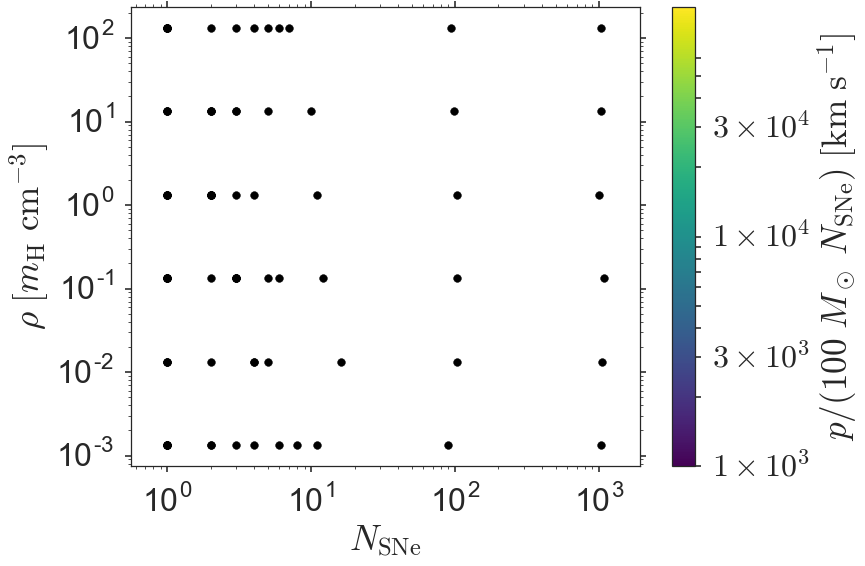

In [7]:
mask = aggregated_results.usable & (aggregated_results.num_SNe>=1) \
    & np.isclose(aggregated_results.metallicities, metallicity_solar, atol=0)

# xin = aggregated_results.num_SNe[mask]
# yin = aggregated_results.densities[mask]
# zin = aggregated_results.momenta[mask] \
#     / (100 * M_solar * aggregated_results.num_SNe[mask])

# xs = np.logspace(np.log10(xin).min(), np.log10(xin).max(), num=100)
# ys = np.logspace(np.log10(yin).min(), np.log10(yin).max(), num=100)

# xx,yy = np.meshgrid(xs, ys)
# zs = 10**interpolate.griddata(np.log10(np.vstack([xin, yin]).T),
#                               np.log10(zin),
#                               (np.log10(xx), np.log10(yy)),
#                               method="cubic")

# spacing_x = .3
# spacing_y = .6
# zs = rbf_interpolate_logloglog(xin, yin, zin, xs, ys, spacing_x, spacing_y)

# plt.pcolor(xs, ys, zs, cmap=plt.cm.viridis, 
#            norm=LogNorm(vmin=3e3, vmax=5e4),
# #            norm=LogNorm(vmin=10**3, vmax=10**5),
# #            vmin=0, vmax=60000,
#            edgecolors="none")
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, 
                           norm=LogNorm(vmin=1e3,
                                        vmax=1e5))
sm._A=[]
plt.colorbar(sm, label=r"$ p / (100$ $ M_\odot$ $ N_\mathrm{SNe}) $ $[\mathrm{km}$ $\mathrm{s}^{-1}]$",
             ticks=[1e3,2e3,3e3,4e3,5e3,6e3,7e3,8e3,9e3,1e4,2e4,3e4,4e4,5e4,6e4],
             format=ticker.FuncFormatter(momentum_tick_formatter))

# plt.contour(xs,ys,
# #             scipy.ndimage.filters.gaussian_filter(zs,3),
#             zs,
# #             levels=np.linspace(0,60000,num=10), 
#             levels=np.logspace(np.log10(3e3),np.log10(5e4),num=8), 
#             cmap=plt.cm.Greys_r,
#             locator=ticker.LogLocator(),
# #             norm=LogNorm(),
#            )
plt.xlabel(r"$ N_\mathrm{SNe}$")
plt.ylabel(r"$ \rho $ $[m_\mathrm{H}$ $\mathrm{cm}^{-3}]$")
plt.xscale("log")
plt.yscale("log")
plt.scatter(aggregated_results.num_SNe[mask],
            aggregated_results.densities[mask] / m_proton,
            color="k",s=60)
plt.xlim(aggregated_results.num_SNe[mask].min()*10**-.25,
         aggregated_results.num_SNe[mask].max()*10**.25)
plt.ylim(aggregated_results.densities[mask].min()*10**-.25 / m_proton,
         aggregated_results.densities[mask].max()*10**.25 / m_proton)

plt.tight_layout()
plot_filename = os.path.join(plots_dir, "momentum_overview-density-empty")
plt.savefig(plot_filename + ".eps")
plt.savefig(plot_filename + ".pdf")
plt.savefig(plot_filename + ".png")

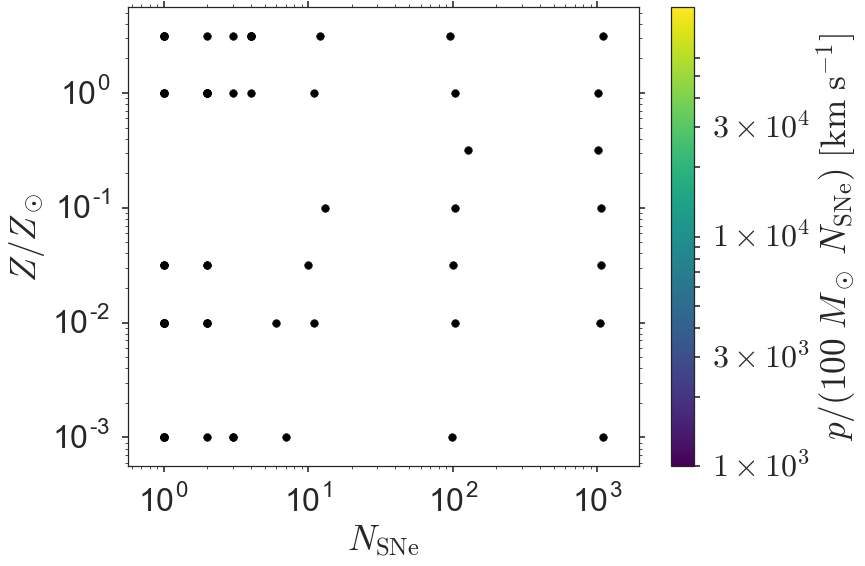

In [8]:
mask = aggregated_results.usable & (aggregated_results.num_SNe>=1) \
    & np.isclose(aggregated_results.densities, 1.33*m_proton, atol=0)

# xin = aggregated_results.num_SNe[mask]
# yin = aggregated_results.metallicities[mask] / metallicity_solar
# zin = aggregated_results.momenta[mask] \
#     / (100 * M_solar * aggregated_results.num_SNe[mask])

# xs = np.logspace(np.log10(xin).min(), np.log10(xin).max(), num=100)
# ys = np.logspace(np.log10(yin).min(), np.log10(yin).max(), num=100)

# xx,yy = np.meshgrid(xs, ys)
# zs = 10**interpolate.griddata(np.log10(np.vstack([xin, yin]).T),
#                               np.log10(zin),
#                               (np.log10(xx), np.log10(yy)),
#                               method="cubic")

# spacing_x = .3
# spacing_y = .3
# zs = rbf_interpolate_logloglog(xin, yin, zin, xs, ys, spacing_x, spacing_y)

# plt.pcolor(xs, ys, zs, cmap=plt.cm.viridis, 
# #            vmin=0, 
# #            vmax=6e4,
#            norm=LogNorm(vmin=3e3, vmax=5e4),
# #            norm=LogNorm(vmin=10**3, vmax=10**5),
#            edgecolors="none",
#           )

sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, 
                           norm=LogNorm(vmin=1e3,
                                        vmax=1e5))
sm._A=[]
plt.colorbar(sm, label=r"$ p / (100$ $ M_\odot$ $ N_\mathrm{SNe}) $ $[\mathrm{km}$ $\mathrm{s}^{-1}]$",
             ticks=[1e3,2e3,3e3,4e3,5e3,6e3,7e3,8e3,9e3,1e4,2e4,3e4,4e4,5e4,6e4],
             format=ticker.FuncFormatter(momentum_tick_formatter),
            )
# plt.contour(xs,ys,
# #             scipy.ndimage.filters.gaussian_filter(zs,3),
#             zs,
#             levels=np.logspace(np.log10(3e3),np.log10(5e4),num=8), 
# #             levels=np.linspace(0,60000,num=10), 
#             cmap=plt.cm.Greys_r,
#             locator=ticker.LogLocator(),
# #             norm=LogNorm(),
#            )
plt.xlabel(r"$ N_\mathrm{SNe}$")
plt.ylabel(r"$Z/Z_\odot$")
plt.xscale("log")
plt.yscale("log")
plt.scatter(aggregated_results.num_SNe[mask],
            aggregated_results.metallicities[mask] / metallicity_solar,
            color="k",s=60)
plt.xlim(aggregated_results.num_SNe[mask].min()*10**-.25,
         aggregated_results.num_SNe[mask].max()*10**.25)
plt.ylim((aggregated_results.metallicities[mask] / metallicity_solar).min()*10**-.25,
         (aggregated_results.metallicities[mask] / metallicity_solar).max()*10**.25)

plt.tight_layout()
plot_filename = os.path.join(plots_dir, "momentum_overview-metallicity-empty")
plt.savefig(plot_filename + ".eps")
plt.savefig(plot_filename + ".pdf")
plt.savefig(plot_filename + ".png")

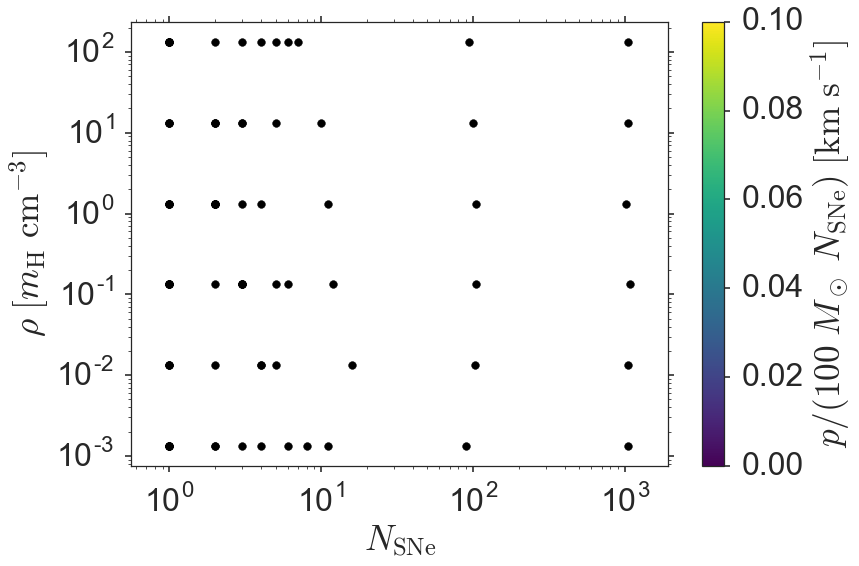

In [9]:
mask = aggregated_results.usable & (aggregated_results.num_SNe>=1) \
    & np.isclose(aggregated_results.metallicities, metallicity_solar, atol=0)

# xin = aggregated_results.num_SNe[mask]
# yin = aggregated_results.densities[mask]
# zin = aggregated_results.momenta[mask] \
#     / (100 * M_solar * aggregated_results.num_SNe[mask])

# xs = np.logspace(np.log10(xin).min(), np.log10(xin).max(), num=100)
# ys = np.logspace(np.log10(yin).min(), np.log10(yin).max(), num=100)

# xx,yy = np.meshgrid(xs, ys)
# zs = 10**interpolate.griddata(np.log10(np.vstack([xin, yin]).T),
#                               np.log10(zin),
#                               (np.log10(xx), np.log10(yy)),
#                               method="cubic")

# spacing_x = .3
# spacing_y = .6
# zs = rbf_interpolate_logloglog(xin, yin, zin, xs, ys, spacing_x, spacing_y)

# plt.pcolor(xs, ys, zs, cmap=plt.cm.viridis, 
#            norm=LogNorm(vmin=3e3, vmax=5e4),
# #            norm=LogNorm(vmin=10**3, vmax=10**5),
# #            vmin=0, vmax=60000,
#            edgecolors="none")
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, 
                           norm=plt.Normalize(vmin=0.0,
                                              vmax=0.1))
sm._A=[]
plt.colorbar(sm, label=r"$ p / (100$ $ M_\odot$ $ N_\mathrm{SNe}) $ $[\mathrm{km}$ $\mathrm{s}^{-1}]$",
             ticks= np.linspace(0,.1, num=6))

# plt.contour(xs,ys,
# #             scipy.ndimage.filters.gaussian_filter(zs,3),
#             zs,
# #             levels=np.linspace(0,60000,num=10), 
#             levels=np.logspace(np.log10(3e3),np.log10(5e4),num=8), 
#             cmap=plt.cm.Greys_r,
#             locator=ticker.LogLocator(),
# #             norm=LogNorm(),
#            )
plt.xlabel(r"$ N_\mathrm{SNe}$")
plt.ylabel(r"$ \rho $ $[m_\mathrm{H}$ $\mathrm{cm}^{-3}]$")
plt.xscale("log")
plt.yscale("log")
plt.scatter(aggregated_results.num_SNe[mask],
            aggregated_results.densities[mask] / m_proton,
            color="k",s=60)
plt.xlim(aggregated_results.num_SNe[mask].min()*10**-.25,
         aggregated_results.num_SNe[mask].max()*10**.25)
plt.ylim(aggregated_results.densities[mask].min()*10**-.25 / m_proton,
         aggregated_results.densities[mask].max()*10**.25 / m_proton)

plt.tight_layout()
plot_filename = os.path.join(plots_dir, "energy_overview-density-empty")
plt.savefig(plot_filename + ".eps")
plt.savefig(plot_filename + ".pdf")
plt.savefig(plot_filename + ".png")

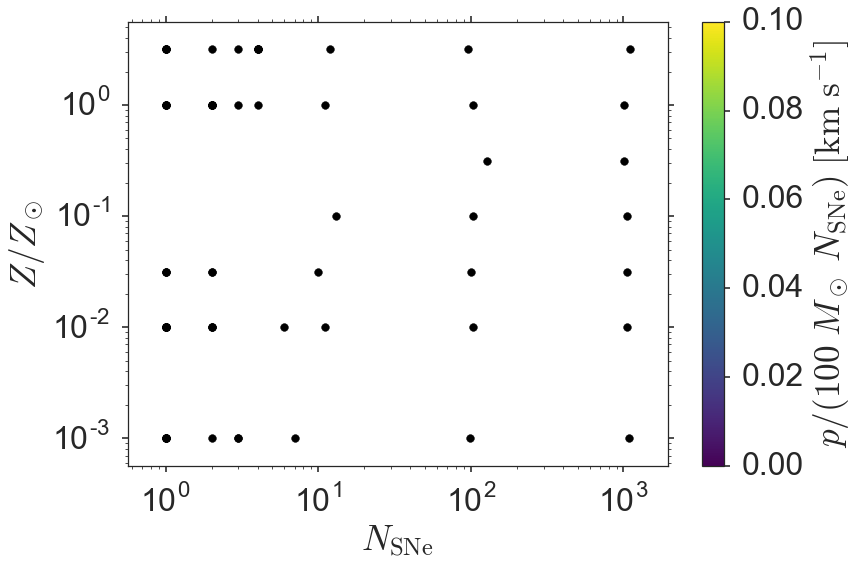

In [10]:
mask = aggregated_results.usable & (aggregated_results.num_SNe>=1) \
    & np.isclose(aggregated_results.densities, 1.33*m_proton, atol=0)

# xin = aggregated_results.num_SNe[mask]
# yin = aggregated_results.metallicities[mask] / metallicity_solar
# zin = aggregated_results.momenta[mask] \
#     / (100 * M_solar * aggregated_results.num_SNe[mask])

# xs = np.logspace(np.log10(xin).min(), np.log10(xin).max(), num=100)
# ys = np.logspace(np.log10(yin).min(), np.log10(yin).max(), num=100)

# xx,yy = np.meshgrid(xs, ys)
# zs = 10**interpolate.griddata(np.log10(np.vstack([xin, yin]).T),
#                               np.log10(zin),
#                               (np.log10(xx), np.log10(yy)),
#                               method="cubic")

# spacing_x = .3
# spacing_y = .3
# zs = rbf_interpolate_logloglog(xin, yin, zin, xs, ys, spacing_x, spacing_y)

# plt.pcolor(xs, ys, zs, cmap=plt.cm.viridis, 
# #            vmin=0, 
# #            vmax=6e4,
#            norm=LogNorm(vmin=3e3, vmax=5e4),
# #            norm=LogNorm(vmin=10**3, vmax=10**5),
#            edgecolors="none",
#           )

sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, 
                           norm=plt.Normalize(vmin=0.0,
                                              vmax=0.1))
sm._A=[]
plt.colorbar(sm, label=r"$ p / (100$ $ M_\odot$ $ N_\mathrm{SNe}) $ $[\mathrm{km}$ $\mathrm{s}^{-1}]$",
             ticks= np.linspace(0,.1, num=6))

# plt.contour(xs,ys,
# #             scipy.ndimage.filters.gaussian_filter(zs,3),
#             zs,
#             levels=np.logspace(np.log10(3e3),np.log10(5e4),num=8), 
# #             levels=np.linspace(0,60000,num=10), 
#             cmap=plt.cm.Greys_r,
#             locator=ticker.LogLocator(),
# #             norm=LogNorm(),
#            )
plt.xlabel(r"$ N_\mathrm{SNe}$")
plt.ylabel(r"$Z/Z_\odot$")
plt.xscale("log")
plt.yscale("log")
plt.scatter(aggregated_results.num_SNe[mask],
            aggregated_results.metallicities[mask] / metallicity_solar,
            color="k",s=60)
plt.xlim(aggregated_results.num_SNe[mask].min()*10**-.25,
         aggregated_results.num_SNe[mask].max()*10**.25)
plt.ylim((aggregated_results.metallicities[mask] / metallicity_solar).min()*10**-.25,
         (aggregated_results.metallicities[mask] / metallicity_solar).max()*10**.25)

plt.tight_layout()
plot_filename = os.path.join(plots_dir, "energy_overview-metallicity-empty")
plt.savefig(plot_filename + ".eps")
plt.savefig(plot_filename + ".pdf")
plt.savefig(plot_filename + ".png")

## With Results

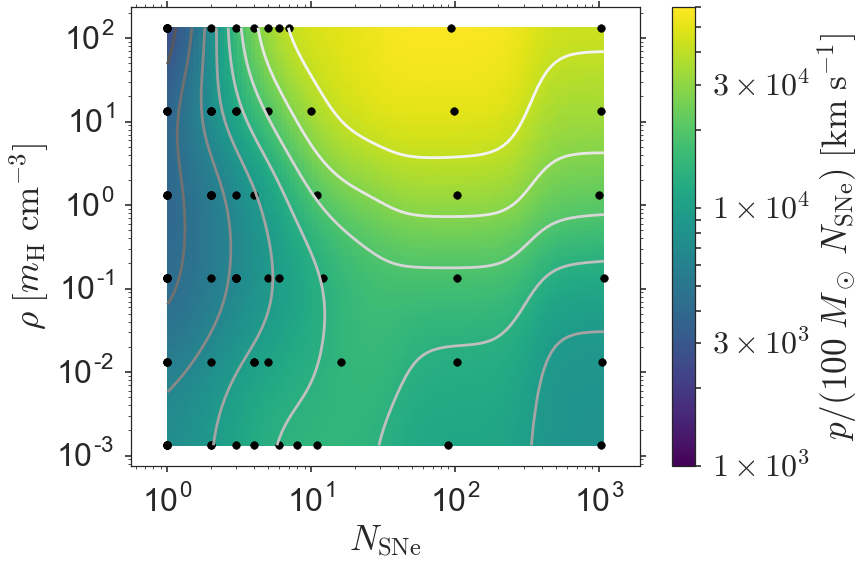

In [11]:
mask = aggregated_results.usable & (aggregated_results.num_SNe>=1) \
    & np.isclose(aggregated_results.metallicities, metallicity_solar, atol=0)

xin = aggregated_results.num_SNe[mask]
yin = aggregated_results.densities[mask] / m_proton
zin = aggregated_results.momenta[mask] \
    / (100 * M_solar * aggregated_results.num_SNe[mask])

xs = np.logspace(np.log10(xin).min(), np.log10(xin).max(), num=100)
ys = np.logspace(np.log10(yin).min(), np.log10(yin).max(), num=100)

# xx,yy = np.meshgrid(xs, ys)
# zs = 10**interpolate.griddata(np.log10(np.vstack([xin, yin]).T),
#                               np.log10(zin),
#                               (np.log10(xx), np.log10(yy)),
#                               method="cubic")

spacing_x = .3
spacing_y = .6
zs = rbf_interpolate_logloglog(xin, yin, zin, xs, ys, spacing_x, spacing_y)

plt.pcolor(xs, ys, zs, cmap=plt.cm.viridis, 
           norm=LogNorm(vmin=1e3, vmax=6e4),
#            norm=LogNorm(vmin=10**3, vmax=10**5),
#            vmin=0, vmax=60000,
           edgecolors="none")
plt.colorbar(label=r"$ p / (100$ $ M_\odot$ $ N_\mathrm{SNe}) $ $[\mathrm{km}$ $\mathrm{s}^{-1}]$",
             ticks=[1e3,2e3,3e3,4e3,5e3,6e3,7e3,8e3,9e3,1e4,2e4,3e4,4e4,5e4,6e4,7e4,8e4,9e4,1e5],
             format=ticker.FuncFormatter(momentum_tick_formatter))

plt.contour(xs,ys,
#             scipy.ndimage.filters.gaussian_filter(zs,3),
            zs,
#             levels=np.linspace(0,60000,num=10), 
            levels=np.logspace(np.log10(1e3),np.log10(6e4),num=12), 
            cmap=plt.cm.Greys_r,
            locator=ticker.LogLocator(),
#             norm=LogNorm(),
           )
plt.xlabel(r"$ N_\mathrm{SNe}$")
plt.ylabel(r"$ \rho $ $[m_\mathrm{H}$ $\mathrm{cm}^{-3}]$")
plt.xscale("log")
plt.yscale("log")
plt.scatter(aggregated_results.num_SNe[mask],
            aggregated_results.densities[mask] / m_proton,
            color="k",s=60)
plt.xlim(xs.min()*10**-.25, xs.max()*10**.25)
plt.ylim(ys.min()*10**-.25, ys.max()*10**.25)

plt.tight_layout()
plot_filename = os.path.join(plots_dir, "momentum_overview-density")
plt.savefig(plot_filename + ".eps")
plt.savefig(plot_filename + ".pdf")
plt.savefig(plot_filename + ".png")

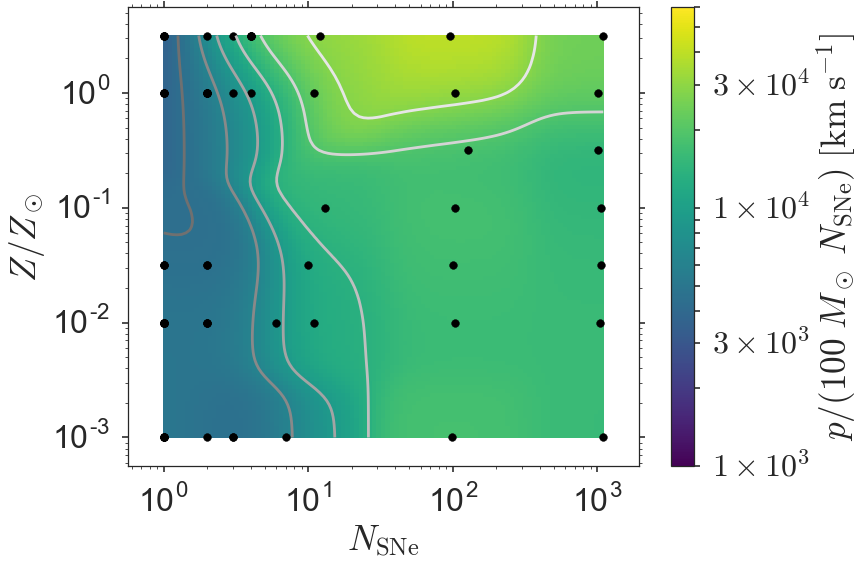

In [12]:
mask = aggregated_results.usable & (aggregated_results.num_SNe>=1) \
    & np.isclose(aggregated_results.densities, 1.33*m_proton, atol=0)

xin = aggregated_results.num_SNe[mask]
yin = aggregated_results.metallicities[mask] / metallicity_solar
zin = aggregated_results.momenta[mask] \
    / (100 * M_solar * aggregated_results.num_SNe[mask])

xs = np.logspace(np.log10(xin).min(), np.log10(xin).max(), num=100)
ys = np.logspace(np.log10(yin).min(), np.log10(yin).max(), num=100)

# xx,yy = np.meshgrid(xs, ys)
# zs = 10**interpolate.griddata(np.log10(np.vstack([xin, yin]).T),
#                               np.log10(zin),
#                               (np.log10(xx), np.log10(yy)),
#                               method="cubic")

spacing_x = .3
spacing_y = .3
zs = rbf_interpolate_logloglog(xin, yin, zin, xs, ys, spacing_x, spacing_y)

plt.pcolor(xs, ys, zs, cmap=plt.cm.viridis, 
#            vmin=0, 
#            vmax=6e4,
           norm=LogNorm(vmin=1e3, vmax=6e4),
#            norm=LogNorm(vmin=10**3, vmax=10**5),
           edgecolors="none",
          )
plt.colorbar(label=r"$ p / (100$ $ M_\odot$ $ N_\mathrm{SNe}) $ $[\mathrm{km}$ $\mathrm{s}^{-1}]$",
             ticks=[1e3,2e3,3e3,4e3,5e3,6e3,7e3,8e3,9e3,1e4,2e4,3e4,4e4,5e4,6e4,7e4,8e4,9e4,1e5],
             format=ticker.FuncFormatter(momentum_tick_formatter),
            )
plt.contour(xs,ys,
#             scipy.ndimage.filters.gaussian_filter(zs,3),
            zs,
            levels=np.logspace(np.log10(1e3),np.log10(6e4),num=12), 
#             levels=np.linspace(0,60000,num=10), 
            cmap=plt.cm.Greys_r,
            locator=ticker.LogLocator(),
#             norm=LogNorm(),
           )
plt.xlabel(r"$ N_\mathrm{SNe}$")
plt.ylabel(r"$Z/Z_\odot$")
plt.xscale("log")
plt.yscale("log")
plt.scatter(aggregated_results.num_SNe[mask],
            aggregated_results.metallicities[mask] / metallicity_solar,
            color="k",s=60)
plt.xlim(xs.min()*10**-.25, xs.max()*10**.25)
plt.ylim(ys.min()*10**-.25, ys.max()*10**.25)

plt.tight_layout()
plot_filename = os.path.join(plots_dir, "momentum_overview-metallicity")
plt.savefig(plot_filename + ".eps")
plt.savefig(plot_filename + ".pdf")
plt.savefig(plot_filename + ".png")

## Overview - Kinetic energy

In [13]:
aggregated_results.E_R_kin = np.array([session.query(Simulation).get(id).E_R_kin 
                                       for id in aggregated_results.ids])

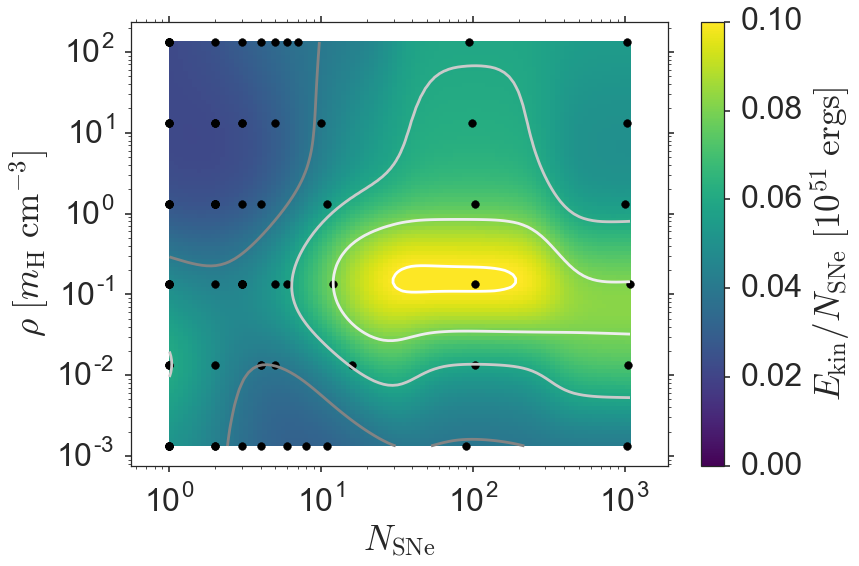

In [14]:
mask = aggregated_results.usable & (aggregated_results.num_SNe>=1) \
    & np.isclose(aggregated_results.metallicities, metallicity_solar, atol=0)

xin = aggregated_results.num_SNe[mask]
yin = aggregated_results.densities[mask] / m_proton
zin = aggregated_results.E_R_kin[mask] \
    / (aggregated_results.num_SNe[mask])

xs = np.logspace(np.log10(xin).min(), np.log10(xin).max(), num=100)
ys = np.logspace(np.log10(yin).min(), np.log10(yin).max(), num=100)

# xx,yy = np.meshgrid(xs, ys)
# zs = 10**interpolate.griddata(np.log10(np.vstack([xin, yin]).T),
#                               np.log10(zin),
#                               (np.log10(xx), np.log10(yy)),
#                               method="cubic")

spacing_x = .3
spacing_y = .6
zs = rbf_interpolate_loglog(xin, yin, zin, xs, ys, spacing_x, spacing_y)

plt.pcolor(xs, ys, zs/1e51, cmap=plt.cm.viridis, 
#            norm=LogNorm(),
           vmin=0, vmax=.1,
           edgecolors="none")
plt.colorbar(label=r"$ E_\mathrm{kin}/N_\mathrm{SNe} $ $[10^{51}$ $ \mathrm{ergs}]$",
             ticks= np.linspace(0,.1, num=6))
plt.contour(xs,ys,
#             scipy.ndimage.filters.gaussian_filter(zs,3),
            zs/1e51,
            levels = np.linspace(0,.1, num=6),
            cmap=plt.cm.Greys_r,
            locator=ticker.LogLocator(),
            norm=LogNorm()
           )
plt.xlabel(r"$ N_\mathrm{SNe}$")
plt.ylabel(r"$ \rho $ $[m_\mathrm{H}$ $\mathrm{cm}^{-3}]$")
plt.xscale("log")
plt.yscale("log")
plt.scatter(aggregated_results.num_SNe[mask],
            aggregated_results.densities[mask] / m_proton,
            color="k",s=60)
plt.xlim(xs.min()*10**-.25, xs.max()*10**.25)
plt.ylim(ys.min()*10**-.25, ys.max()*10**.25)

plt.tight_layout()
plot_filename = os.path.join(plots_dir, "energy_overview-density")
plt.savefig(plot_filename + ".eps")
plt.savefig(plot_filename + ".pdf")
plt.savefig(plot_filename + ".png")


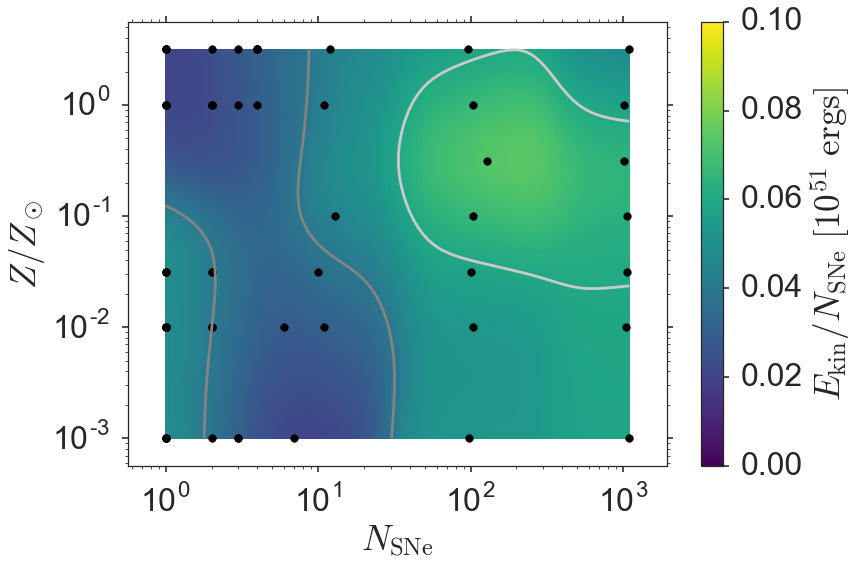

In [15]:
mask = aggregated_results.usable & (aggregated_results.num_SNe>=1) \
    & np.isclose(aggregated_results.densities, 1.33*m_proton, atol=0)

xin = aggregated_results.num_SNe[mask]
yin = aggregated_results.metallicities[mask] / metallicity_solar
zin = aggregated_results.E_R_kin[mask] \
    / (aggregated_results.num_SNe[mask])

xs = np.logspace(np.log10(xin).min(), np.log10(xin).max(), num=100)
ys = np.logspace(np.log10(yin).min(), np.log10(yin).max(), num=100)

# xx,yy = np.meshgrid(xs, ys)
# zs = 10**interpolate.griddata(np.log10(np.vstack([xin, yin]).T),
#                               np.log10(zin),
#                               (np.log10(xx), np.log10(yy)),
#                               method="cubic")

spacing_x = .3
spacing_y = .6
zs = rbf_interpolate_loglog(xin, yin, zin, xs, ys, spacing_x, spacing_y)

plt.pcolor(xs, ys, zs/1e51, cmap=plt.cm.viridis, 
#            norm=LogNorm(),
           vmin=0, vmax=.1,
           edgecolors="none")
plt.colorbar(label=r"$ E_\mathrm{kin}/N_\mathrm{SNe} $ $[10^{51}$ $ \mathrm{ergs}]$",
             ticks= np.linspace(0,.1, num=6))
plt.contour(xs,ys,
#             scipy.ndimage.filters.gaussian_filter(zs,3),
            zs/1e51,
            levels = np.linspace(0,.1, num=6),
            cmap=plt.cm.Greys_r,
            locator=ticker.LogLocator(),
            norm=LogNorm()
           )
plt.xlabel(r"$ N_\mathrm{SNe}$")
plt.ylabel(r"$Z/Z_\odot$")
plt.xscale("log")
plt.yscale("log")
plt.scatter(aggregated_results.num_SNe[mask],
            aggregated_results.metallicities[mask] / metallicity_solar,
            color="k",s=60)
plt.xlim(xs.min()*10**-.25, xs.max()*10**.25)
plt.ylim(ys.min()*10**-.25, ys.max()*10**.25)

plt.tight_layout()
plot_filename = os.path.join(plots_dir, "energy_overview-metallicity")
plt.savefig(plot_filename + ".eps")
plt.savefig(plot_filename + ".pdf")
plt.savefig(plot_filename + ".png")


## Momentum Scaling -- After Last SN

In [2]:
data_dir = "../saved_runs/sample_mass_scaling"
data_dir = data_dir_default

density = 1.33e-3 * m_proton 
metallicity = metallicity_solar
masses, momenta, ids = extract_masses_momenta_raw(data_dir,density, metallicity, 
                                                  extract_at_last_SN=True)
N_SNe = np.array([Overview(os.path.join(data_dir, id + "_overview.dat")).num_SNe for id in ids])

mask = N_SNe > 1
masses  = masses[mask]
momenta = momenta[mask]
ids     = ids[mask]


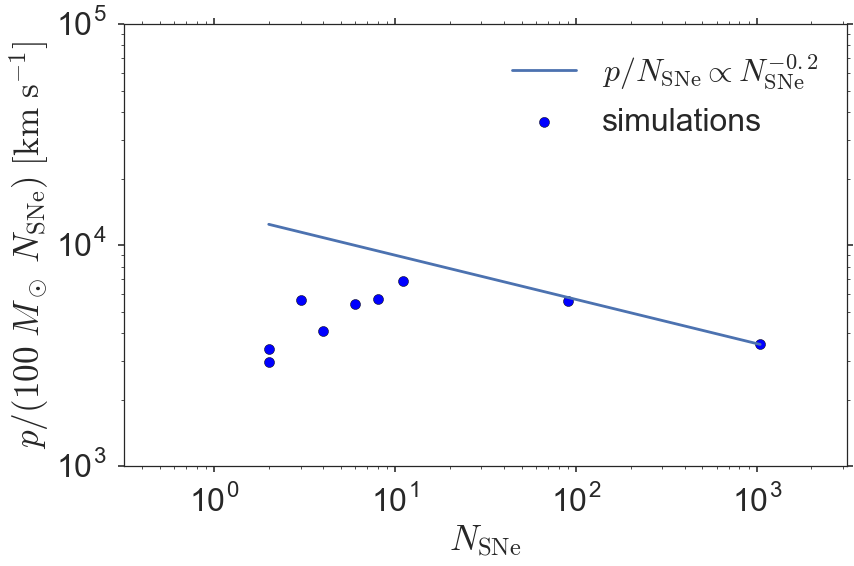

In [3]:
marker_scale = 100
reference_point = -1

plt.scatter(N_SNe, momenta / (100 * M_solar * N_SNe * (100 * 1000)),
            label="simulations", s=marker_scale, marker="o")

N_SNe_synthetic = np.logspace(np.log10(N_SNe.min()),np.log10(N_SNe.max()))
plt.plot(N_SNe_synthetic, 
         (momenta[reference_point] / (N_SNe[reference_point] * 100 * M_solar * 1e5)) \
             * (N_SNe_synthetic / N_SNe[reference_point])**-.2,
        label=r"$p/N_\mathrm{SNe} \propto N_\mathrm{SNe}^{-0.2}$")
plt.xscale("log")
plt.yscale("log")
plt.xlim( 10**-.5, 10**3.5)
plt.ylim(ymin=10**3, ymax=10**5)
plt.legend(loc="best")
plt.xlabel("$N_\mathrm{SNe}$")
plt.ylabel(r"$p / (100$ $M_\odot$ $N_\mathrm{SNe})$ $[\mathrm{km}$ $\mathrm{s}^{-1}]$")


plt.tight_layout()
plot_filename = os.path.join(plots_dir, "momentum_scaling-last_SNe-density-1e-3")
plt.savefig(plot_filename + ".eps")
plt.savefig(plot_filename + ".pdf")
plt.savefig(plot_filename + ".png")

## Momentum Scaling -- Converged

In [4]:
data_dir = data_dir_default
density = 1.33e-3 * m_proton 
metallicity = metallicity_solar
masses, momenta, ids = extract_masses_momenta_raw(data_dir,density, metallicity, 
                                                  extract_at_last_SN=False)
N_SNe = np.array([Overview(os.path.join(data_dir, id + "_overview.dat")).num_SNe for id in ids])

mask = N_SNe > 0
masses  = masses[mask]
momenta = momenta[mask]
ids     = ids[mask]
N_SNe   = N_SNe[mask]

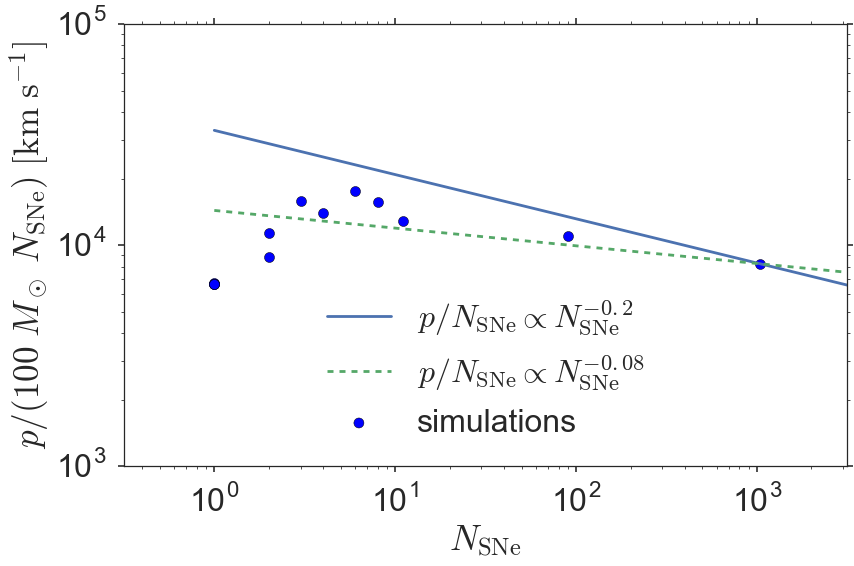

In [5]:

marker_scale = 100
reference_point = -1

plt.scatter(N_SNe, momenta / (100 * M_solar * N_SNe * (100 * 1000)),
            label="simulations", s=marker_scale, marker="o")

N_SNe_synthetic = np.logspace(np.log10(N_SNe.min()), N_SNe.max())
plt.plot(N_SNe_synthetic, 
         (momenta[reference_point] / (N_SNe[reference_point] * 100 * M_solar * 1e5)) \
             * (N_SNe_synthetic / N_SNe[reference_point])**-.2,
        label=r"$p/N_\mathrm{SNe} \propto N_\mathrm{SNe}^{-0.2}$")
plt.plot(N_SNe_synthetic, 
         (momenta[reference_point] / (N_SNe[reference_point] * 100 * M_solar * 1e5)) \
             * (N_SNe_synthetic / N_SNe[reference_point])**-.08,
        label=r"$p/N_\mathrm{SNe} \propto N_\mathrm{SNe}^{-0.08}$",
        linestyle="--")
plt.xscale("log")
plt.yscale("log")
plt.xlim( 10**-.5, 10**3.5)
plt.ylim(ymin=10**3, ymax=10**5)
plt.legend(loc="lower center")

plt.xlabel("$N_\mathrm{SNe}$")
plt.ylabel(r"$p / (100$ $M_\odot$ $N_\mathrm{SNe})$ $[\mathrm{km}$ $\mathrm{s}^{-1}]$")


plt.tight_layout()
plot_filename = os.path.join(plots_dir, "momentum_scaling-converged-density-1e-3")
plt.savefig(plot_filename + ".eps")
plt.savefig(plot_filename + ".pdf")
plt.savefig(plot_filename + ".png")

# Momentum Fit

In [15]:
from clustered_SNe.analysis.fit_helpers import AggregatedResults
    
aggregated_results = AggregatedResults()
MLE_fit = aggregated_results.get_MLE_fit()
Bayesian_fit = aggregated_results.get_Bayesian_fit()

/Users/egentry/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


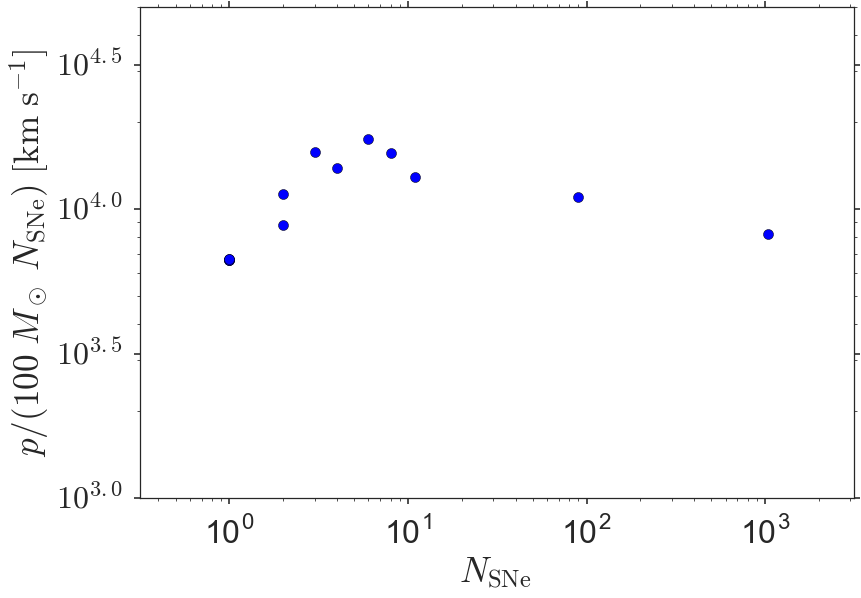

In [16]:


metallicity_index = np.argmax(np.isclose(aggregated_results.metallicities_1D,
                                         metallicity_solar*10**0,atol=0))
metallicity = aggregated_results.metallicities_1D[metallicity_index]
density_index = np.argmax(np.isclose(aggregated_results.densities_1D,
                                     1e-3 * 1.33*m_proton,atol=0))
density = aggregated_results.densities_1D[density_index]

aggregated_results.plot_slice(metallicity, density,
#                               with_MLE_fit=True, MLE_fit=MLE_fit,
#                               with_Bayesian_fit=True, Bayesian_fit=Bayesian_fit,
                              verbose=False, new_figure=False)


# plt.axhline(3000, 
#             color="g", linestyle="dashed", 
#             label="Ostriker & Shetty (2011)")
plt.yscale("log")
plt.ylim(1e3, 5e4)
plt.legend(loc="lower left", bbox_to_anchor=(.3, .05))
ax = plt.gca()
ax.legend_.set_visible(False)

ticks = [10**3, 10**3.5, 10**4, 10**4.5 ]
plt.gca().set_yticks(ticks)
plt.gca().set_yticklabels([r"$10^{{{0}}}$".format(round(np.log10(tick),1)) for tick in ticks])


# from matplotlib.ticker import FormatStrFormatter
# plt.gca().yaxis.set_minor_formatter(FormatStrFormatter("%.0e"))


# plots_dir = "plots_for_paper"
# plt.tight_layout()
# plot_filename = os.path.join(plots_dir, "momentum-fit-sample-empty-loglog-lowdensity")
# plt.savefig(plot_filename + ".eps")
# plt.savefig(plot_filename + ".pdf")
# plt.savefig(plot_filename + ".png")


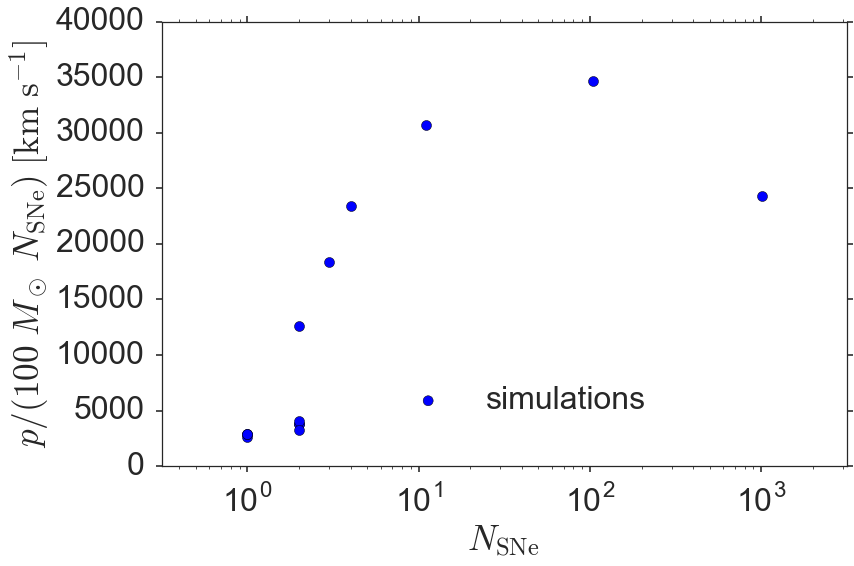

In [17]:


metallicity_index = np.argmax(np.isclose(aggregated_results.metallicities_1D,
                                         metallicity_solar*10**0,atol=0))
metallicity = aggregated_results.metallicities_1D[metallicity_index]
density_index = np.argmax(np.isclose(aggregated_results.densities_1D,
                                     1e0 * 1.33*m_proton,atol=0))
density = aggregated_results.densities_1D[density_index]

aggregated_results.plot_slice(metallicity, density,
#                               with_MLE_fit=True, MLE_fit=MLE_fit,
#                               with_Bayesian_fit=True, Bayesian_fit=Bayesian_fit,
                              verbose=False, new_figure=False)


# plt.axhline(3000, 
#             color="g", linestyle="dashed", 
#             label="Ostriker & Shetty (2011)")
plt.legend(loc="lower left", bbox_to_anchor=(.3, .05))

plots_dir = "plots_for_paper"
plt.tight_layout()
plot_filename = os.path.join(plots_dir, "momentum-fit-sample-empty")
plt.savefig(plot_filename + ".eps")
plt.savefig(plot_filename + ".pdf")
plt.savefig(plot_filename + ".png")


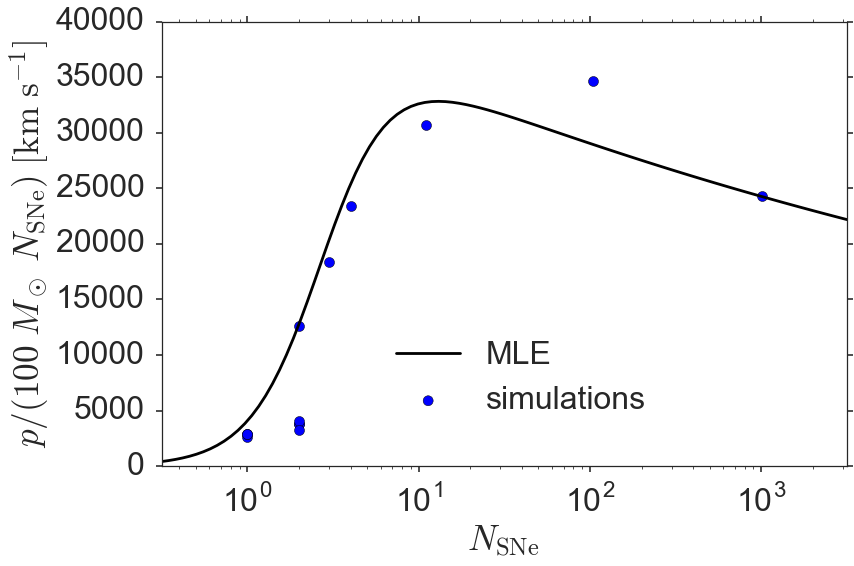

In [18]:
metallicity_index = np.argmax(np.isclose(aggregated_results.metallicities_1D,
                                         metallicity_solar*10**0,atol=0))
metallicity = aggregated_results.metallicities_1D[metallicity_index]
density_index = np.argmax(np.isclose(aggregated_results.densities_1D,
                                     1e0 * 1.33*m_proton,atol=0))
density = aggregated_results.densities_1D[density_index]

aggregated_results.plot_slice(metallicity, density,
                              with_MLE_fit=True, MLE_fit=MLE_fit,
#                               with_Bayesian_fit=True, Bayesian_fit=Bayesian_fit,
                              verbose=False, new_figure=False)

plt.gca().lines[0].set_label("MLE")
plt.gca().lines[0].set_color("k")

# plt.axhline(3000, 
#             color="g", linestyle="dashed", 
#             label="Ostriker & Shetty (2011)")
plt.legend(loc="lower left", bbox_to_anchor=(.3, .05))

plots_dir = "plots_for_paper"
plt.tight_layout()
plot_filename = os.path.join(plots_dir, "momentum-fit-sample-MLE")
plt.savefig(plot_filename + ".eps")
plt.savefig(plot_filename + ".pdf")
plt.savefig(plot_filename + ".png")


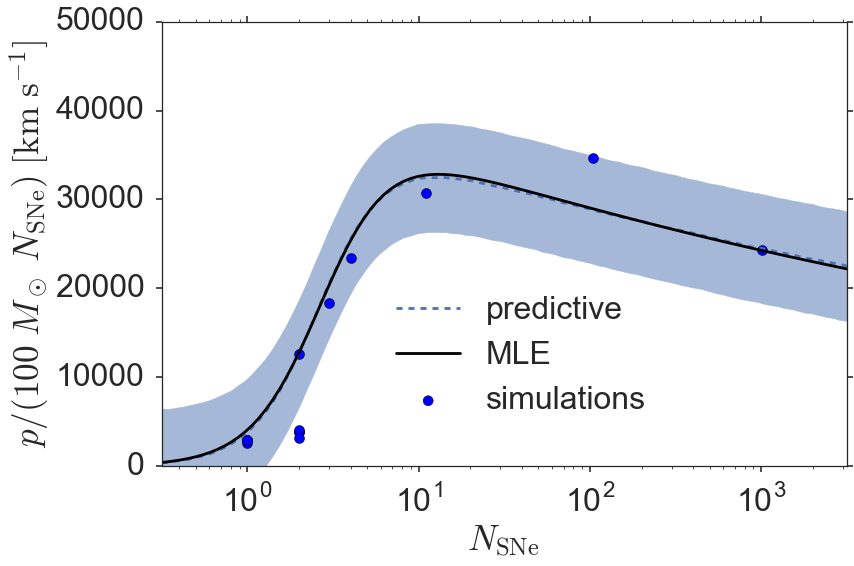

In [19]:
metallicity_index = np.argmax(np.isclose(aggregated_results.metallicities_1D,
                                         metallicity_solar*10**0,atol=0))
metallicity = aggregated_results.metallicities_1D[metallicity_index]
density_index = np.argmax(np.isclose(aggregated_results.densities_1D,
                                     1e0 * 1.33*m_proton,atol=0))
density = aggregated_results.densities_1D[density_index]

aggregated_results.plot_slice(metallicity, density,
                              with_MLE_fit=True, MLE_fit=MLE_fit,
                              with_Bayesian_fit=True, Bayesian_fit=Bayesian_fit,
                              verbose=False, new_figure=False)

a = plt.gca()

a.lines[1].set_color("k")

a.lines[0].set_linestyle("dashed")

a.lines[1].set_label("MLE")
a.lines[0].set_label("predictive")

# plt.axhline(3000, 
#             color="g", linestyle="dashed", 
#             label="Ostriker & Shetty (2011)")
plt.legend(loc="lower left", bbox_to_anchor=(.3, .05))

plots_dir = "plots_for_paper"
plt.tight_layout()
plot_filename = os.path.join(plots_dir, "momentum-fit-sample-MLE+Bayes")
plt.savefig(plot_filename + ".eps")
plt.savefig(plot_filename + ".pdf")
plt.savefig(plot_filename + ".png")


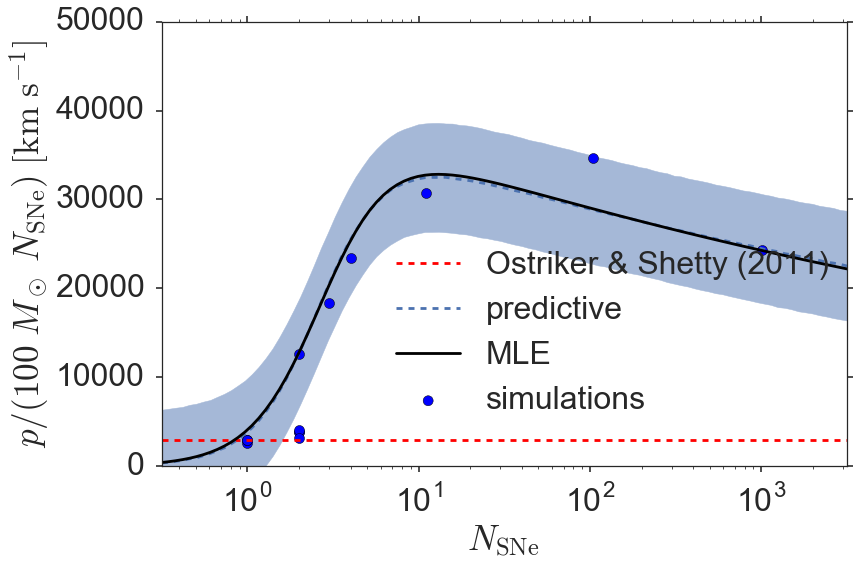

In [20]:
metallicity_index = np.argmax(np.isclose(aggregated_results.metallicities_1D,
                                         metallicity_solar*10**0,atol=0))
metallicity = aggregated_results.metallicities_1D[metallicity_index]
density_index = np.argmax(np.isclose(aggregated_results.densities_1D,
                                     1e0 * 1.33*m_proton,atol=0))
density = aggregated_results.densities_1D[density_index]

plt.axhline(3000, 
            color="r", linestyle="dashed", 
            label="Ostriker & Shetty (2011)")

aggregated_results.plot_slice(metallicity, density,
                              with_MLE_fit=True, MLE_fit=MLE_fit,
                              with_Bayesian_fit=True, Bayesian_fit=Bayesian_fit,
                              verbose=False, new_figure=False)

a = plt.gca()

a.lines[2].set_color("k")

a.lines[1].set_linestyle("dashed")

a.lines[2].set_label("MLE")
a.lines[1].set_label("predictive")

# plt.legend(loc="lower right")
plt.legend(loc="lower left", bbox_to_anchor=(.3, .05))


plots_dir = "plots_for_paper"
plt.tight_layout()
plot_filename = os.path.join(plots_dir, "momentum-fit-sample-MLE+Bayes+OS2011")
plt.savefig(plot_filename + ".eps")
plt.savefig(plot_filename + ".pdf")
plt.savefig(plot_filename + ".png")


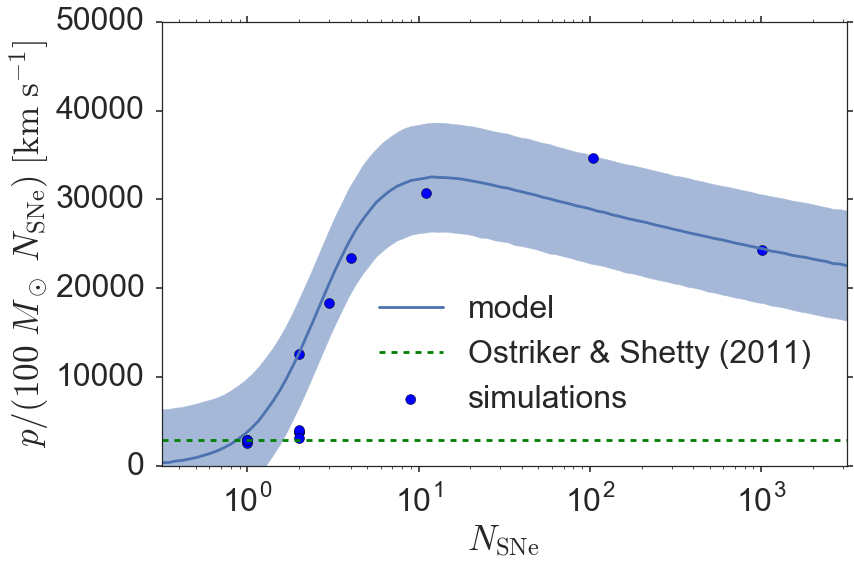

In [21]:
metallicity_index = np.argmax(np.isclose(aggregated_results.metallicities_1D,
                                         metallicity_solar*10**0,atol=0))
metallicity = aggregated_results.metallicities_1D[metallicity_index]
density_index = np.argmax(np.isclose(aggregated_results.densities_1D,
                                     1e0 * 1.33*m_proton,atol=0))
density = aggregated_results.densities_1D[density_index]

aggregated_results.plot_slice(metallicity, density,
#                               with_MLE_fit=True, MLE_fit=MLE_fit,
                              with_Bayesian_fit=True, Bayesian_fit=Bayesian_fit,
                              verbose=False)


plt.axhline(3000, 
            color="g", linestyle="dashed", 
            label="Ostriker & Shetty (2011)")
plt.legend(bbox_to_anchor=(.99, .45))

plots_dir = "plots_for_paper"
plt.tight_layout()
plot_filename = os.path.join(plots_dir, "momentum-fit-sample")
plt.savefig(plot_filename + ".eps")
plt.savefig(plot_filename + ".pdf")
plt.savefig(plot_filename + ".png")


In [22]:
# MLE_fit.print_latex_version()

In [23]:
str(MLE_fit)

'p/(100 * M_sun * N_SNe) ~ min(4.61e+03 * (Z / Z_sun)**0.08 * (rho / m_p)**-0.05 * (N_SNe/1)**2.06 , 2.33e+04 * (Z / Z_sun)**0.15 * (rho / m_p)**0.14 * (N_SNe/1000)**-0.08)'

# Momentum-Density Dependence
## Few SNe

In [9]:
from clustered_SNe.analysis.fit_helpers import AggregatedResults
    
aggregated_results = AggregatedResults()

/Users/egentry/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


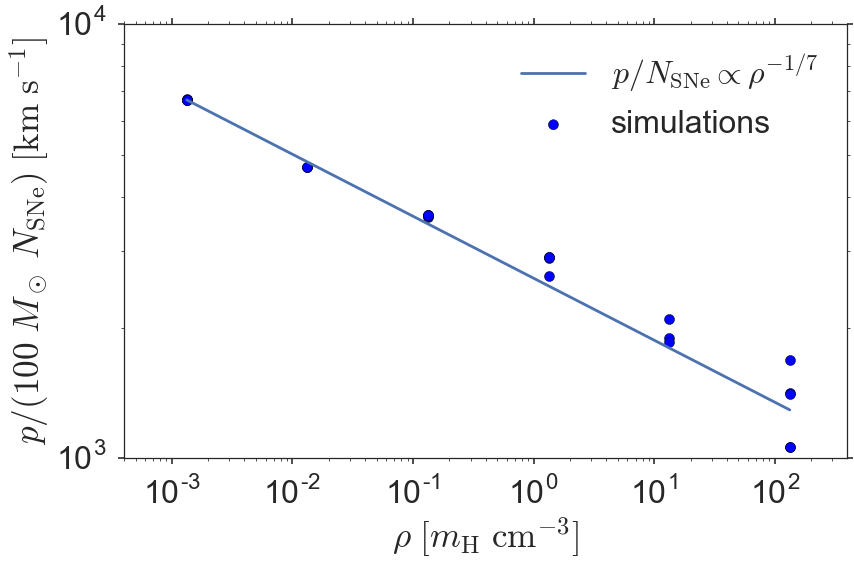

In [10]:
mask =    aggregated_results.usable \
        & (aggregated_results.num_SNe==1) \
        & np.isclose(aggregated_results.metallicities, metallicity_solar, atol=0)

plt.scatter(aggregated_results.densities[mask] / m_proton,
            aggregated_results.momenta[mask] \
                / (100 * M_solar * aggregated_results.num_SNe[mask]),
            s=100,
            marker="o",
            label="simulations"
         )

plt.xscale("log")
plt.yscale("log")

plt.xlim(.3*1.33e-3, 3*1.33e2)
plt.xlabel(r"$\rho$ $[m_\mathrm{H}$ $\mathrm{cm}^{-3}]$")
plt.ylabel(r"$p / (100$ $M_\odot$ $N_\mathrm{SNe})$ $[\mathrm{km}$ $\mathrm{s}^{-1}]$")


x_fit = np.logspace(np.log10(aggregated_results.densities[mask].min()), 
                    np.log10(aggregated_results.densities[mask].max()))

pivot_indices = np.where(mask & np.isclose(aggregated_results.densities,
                                           1.33e-3*m_proton, atol=0))

pivot_index = aggregated_results.densities[mask].argmin()
pivot_density = np.mean(aggregated_results.densities[pivot_indices])
pivot_momentum = np.mean(aggregated_results.momenta[pivot_indices] \
                         / (100 * M_solar * aggregated_results.num_SNe[pivot_indices]))
plt.plot(x_fit / m_proton, pivot_momentum*(x_fit/pivot_density)**(-1/7),
         label=r"$p/N_\mathrm{SNe} \propto \rho^{-1/7}$")

plt.legend(loc="best")
plt.tight_layout()
plot_filename = os.path.join(plots_dir, "momentum_scaling-density-few")
plt.savefig(plot_filename + ".eps")
plt.savefig(plot_filename + ".pdf")
plt.savefig(plot_filename + ".png")

## Many SNe

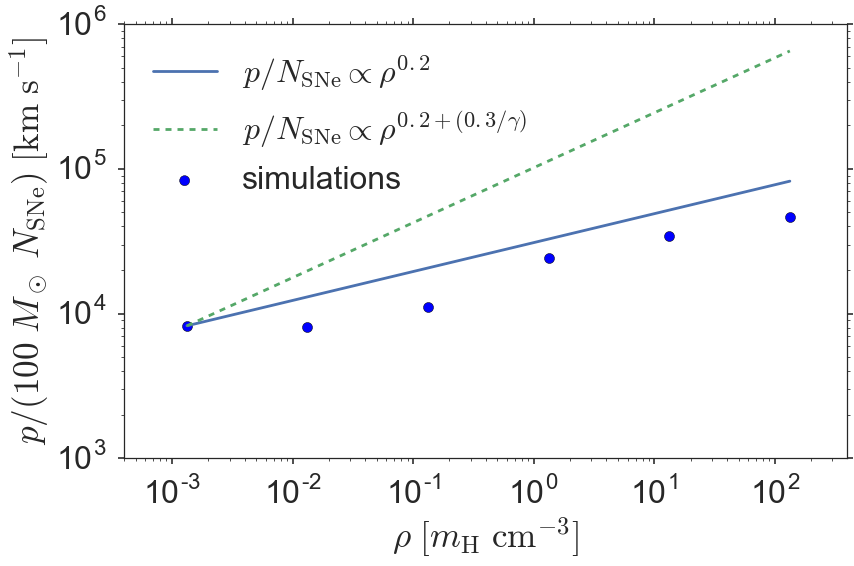

In [18]:
mask =    aggregated_results.usable \
        & (aggregated_results.num_SNe>1000) \
        & np.isclose(aggregated_results.metallicities, metallicity_solar, atol=0)

plt.scatter(aggregated_results.densities[mask] / m_proton,
            aggregated_results.momenta[mask] / (100 * M_solar * aggregated_results.num_SNe[mask]),
            s=100,
            marker="o",
            label="simulations"
         )

plt.xscale("log")
plt.yscale("log")

plt.xlim(.3*1.33e-3, 3*1.33e2)
plt.xlabel(r"$\rho$ $[m_\mathrm{H}$ $\mathrm{cm}^{-3}]$")
plt.ylabel(r"$p / (100$ $M_\odot$ $N_\mathrm{SNe})$ $[\mathrm{km}$ $\mathrm{s}^{-1}]$")


x_fit = np.logspace(np.log10(aggregated_results.densities[mask].min()), 
                    np.log10(aggregated_results.densities[mask].max()))

pivot_indices = np.where(mask & np.isclose(aggregated_results.densities,
                                           1.33e-3*m_proton, atol=0))

pivot_index = aggregated_results.densities[mask].argmin()
pivot_density = np.mean(aggregated_results.densities[pivot_indices])
pivot_momentum = np.mean(aggregated_results.momenta[pivot_indices] / (100 * M_solar * aggregated_results.num_SNe[pivot_indices]))
plt.plot(x_fit / m_proton, pivot_momentum*(x_fit/pivot_density)**(0.2),
         label=r"$p/N_\mathrm{SNe} \propto \rho^{0.2}$")
plt.plot(x_fit / m_proton, pivot_momentum*(x_fit/pivot_density)**(0.2 + (0.3/(5/3))),
         label=r"$p/N_\mathrm{SNe} \propto \rho^{0.2 + (0.3/\gamma)}$",
         linestyle="dashed")

plt.legend(loc="upper left")
plt.tight_layout()
plot_filename = os.path.join(plots_dir, "momentum_scaling-density-many")
plt.savefig(plot_filename + ".eps")
plt.savefig(plot_filename + ".pdf")
plt.savefig(plot_filename + ".png")

# Momentum Evolution
## Few SNe

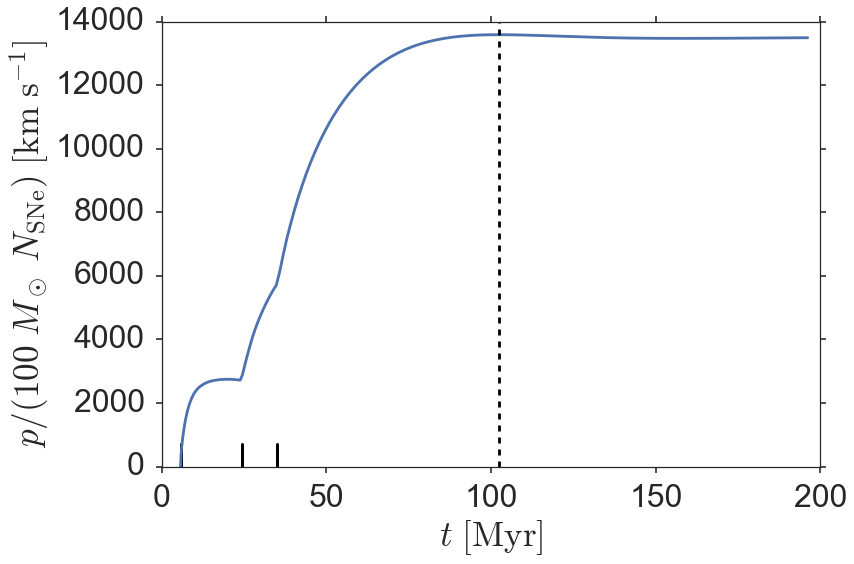

In [91]:
# data_dir = data_dir_default

# id = "fe04f467-9b8d-426c-a884-31852f683649"

# run_summary = RunSummary(data_dir, id)

# plot_momentum(run_summary, x_axis="time", y_axis_scaling="SNe", distplot=True, clear_previous=True)

# plt.tight_layout()
# plot_filename = os.path.join(plots_dir, "momentum_evolution-few-SNe")
# plt.savefig(plot_filename + ".eps")
# plt.savefig(plot_filename + ".pdf")
# plt.savefig(plot_filename + ".png")

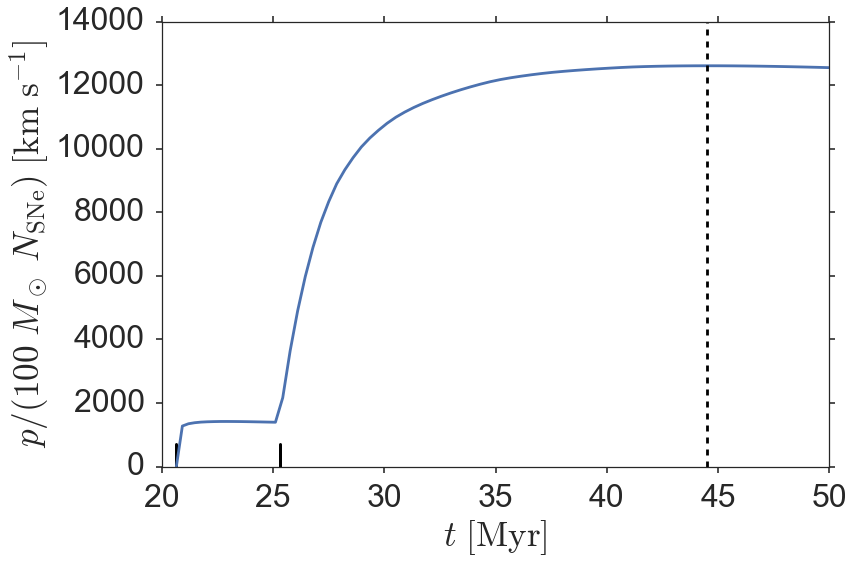

In [2]:
data_dir = data_dir_default

id = "b5ebaf79-a887-4004-95d6-f581aceeaa24"

run_summary = RunSummary(data_dir, id)

plot_momentum(run_summary, x_axis="time", y_axis_scaling="SNe", distplot=True, clear_previous=True)

plt.xlim(xmax=50)

plt.tight_layout()
plot_filename = os.path.join(plots_dir, "momentum_evolution-few-SNe")
plt.savefig(plot_filename + ".eps")
plt.savefig(plot_filename + ".pdf")
plt.savefig(plot_filename + ".png")

## 11 SNe

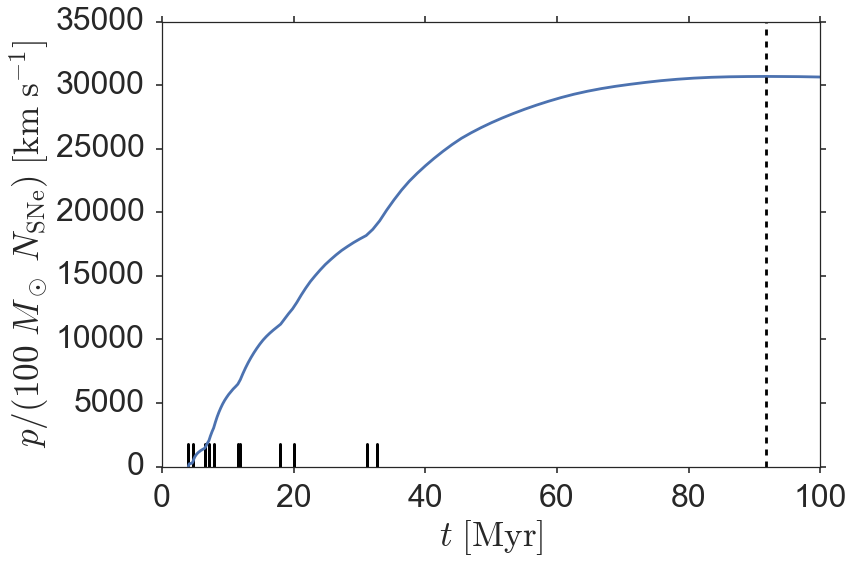

In [54]:
data_dir = data_dir_default

id = "25451948-485f-46fe-b87b-f4329d03b203"

run_summary = RunSummary(data_dir, id)

plot_momentum(run_summary, x_axis="time", y_axis_scaling="SNe", distplot=True, clear_previous=True)

plt.xlim(xmax=100)

plt.tight_layout()
plot_filename = os.path.join(plots_dir, "momentum_evolution-10-SNe")
plt.savefig(plot_filename + ".eps")
plt.savefig(plot_filename + ".pdf")
plt.savefig(plot_filename + ".png")

## 11 SNe - low resolution + Eulerian

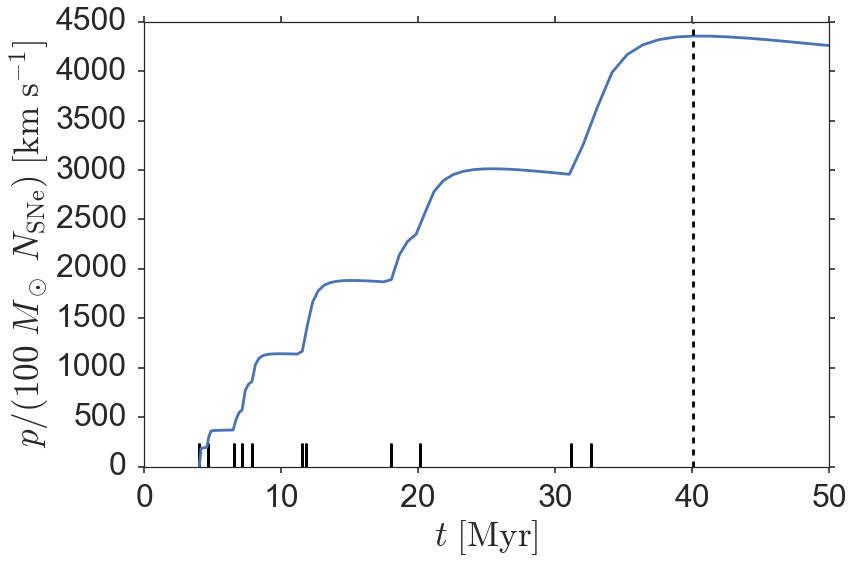

In [56]:
data_dir = "../saved_runs/resolution/10_lores_euler/"

id = ""

run_summary = RunSummary(data_dir, id)

plot_momentum(run_summary, x_axis="time", y_axis_scaling="SNe", distplot=True, clear_previous=True)

plt.xlim(xmax=50)

plt.tight_layout()
plot_filename = os.path.join(plots_dir, "momentum_evolution-10-SNe-lowres")
plt.savefig(plot_filename + ".eps")
plt.savefig(plot_filename + ".pdf")
plt.savefig(plot_filename + ".png")

## 11 SNe - Resolution Comparison

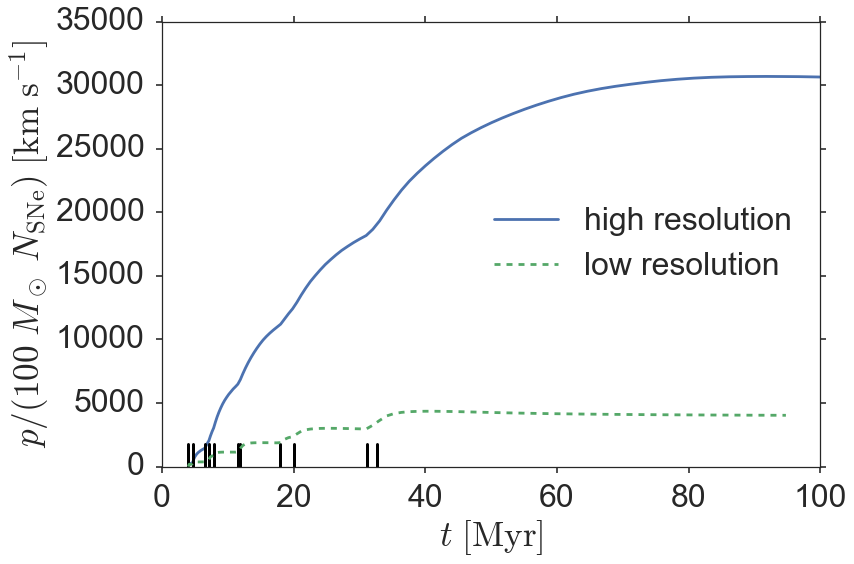

In [11]:
# data_dir = data_dir_default
# id = "25451948-485f-46fe-b87b-f4329d03b203"
# run_summary_hires = RunSummary(data_dir, id)

# plot_momentum(run_summary_hires, 
#               x_axis="time", y_axis_scaling="SNe", 
#               distplot=False, clear_previous=False,
#               with_momentum_axvline=False,
#               label="high resolution")


# data_dir = "../saved_runs/resolution/10_lores_euler/"
# id = ""
# run_summary_lores = RunSummary(data_dir, id)

# plot_momentum(run_summary_lores, 
#               x_axis="time", y_axis_scaling="SNe", 
#               distplot=True, clear_previous=False,
#               with_momentum_axvline=False,
#               label="low resolution")

# plt.gca().get_lines()[-1].set_linestyle("dashed")
# plt.xlim(xmax=100)
# plt.ylim(0, 35000)

# plt.legend(loc="best")


# plt.tight_layout()
# plot_filename = os.path.join(plots_dir,
#                              "momentum_evolution-10-SNe-resolution")
# plt.savefig(plot_filename + ".eps")
# plt.savefig(plot_filename + ".pdf")
# plt.savefig(plot_filename + ".png")

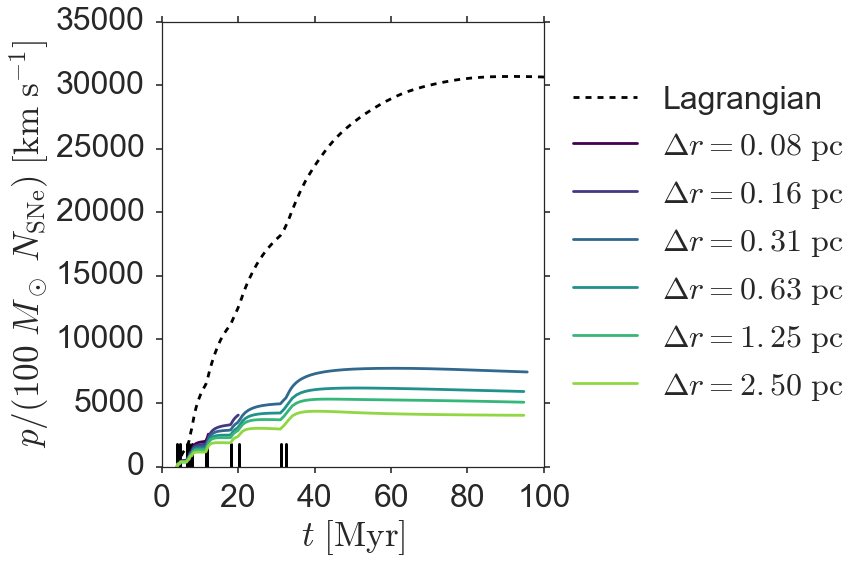

In [2]:
data_dir = data_dir_default
id = "25451948-485f-46fe-b87b-f4329d03b203"
run_summary_hires = RunSummary(data_dir, id)

plot_momentum(run_summary_hires, 
              x_axis="time", y_axis_scaling="SNe", 
              distplot=True, clear_previous=False,
              with_momentum_axvline=False,
              label="Lagrangian")

##
data_dir = "../saved_runs/resolution/10_veryveryhires_euler/"
id = ""
run_summary_veryveryhi = RunSummary(data_dir, id)
assert run_summary_veryveryhi.is_energy_reasonable()

plot_momentum(run_summary_veryveryhi, 
              x_axis="time", y_axis_scaling="SNe", 
              distplot=False, clear_previous=False,
              with_momentum_axvline=False,
              label=r"$\Delta r = 0.08$ $\mathrm{pc}$")


##
data_dir = "../saved_runs/resolution/10_veryhires_euler/"
id = ""
run_summary_veryhi = RunSummary(data_dir, id)

plot_momentum(run_summary_veryhi, 
              x_axis="time", y_axis_scaling="SNe", 
              distplot=False, clear_previous=False,
              with_momentum_axvline=False,
              label=r"$\Delta r = 0.16$ $\mathrm{pc}$")

##
data_dir = "../saved_runs/resolution/10_medhires_euler/"
id = ""
run_summary_medhi = RunSummary(data_dir, id)

plot_momentum(run_summary_medhi, 
              x_axis="time", y_axis_scaling="SNe", 
              distplot=False, clear_previous=False,
              with_momentum_axvline=False,
              label=r"$\Delta r = 0.31$ $\mathrm{pc}$")



##
data_dir = "../saved_runs/resolution/10_hires_euler/"
id = ""
run_summary_hi = RunSummary(data_dir, id)

plot_momentum(run_summary_hi, 
              x_axis="time", y_axis_scaling="SNe", 
              distplot=False, clear_previous=False,
              with_momentum_axvline=False,
              label=r"$\Delta r = 0.63$ $\mathrm{pc}$")


##
data_dir = "../saved_runs/resolution/10_medres_euler/"
id = ""
run_summary_med = RunSummary(data_dir, id)

plot_momentum(run_summary_med, 
              x_axis="time", y_axis_scaling="SNe", 
              distplot=False, clear_previous=False,
              with_momentum_axvline=False,
              label=r"$\Delta r = 1.25$ $\mathrm{pc}$")

##
data_dir = "../saved_runs/resolution/10_lores_euler/"
id = ""
run_summary_lo = RunSummary(data_dir, id)

plot_momentum(run_summary_lo, 
              x_axis="time", y_axis_scaling="SNe", 
              distplot=False, clear_previous=False,
              with_momentum_axvline=False,
              label=r"$\Delta r = 2.50$ $\mathrm{pc}$")

ax = plt.gca()
num_SNe = run_summary_hires.overview.num_SNe
num_lines = len(ax.get_lines()) - num_SNe - 1
colors = [plt.cm.viridis((i)/(num_lines)) for i in range(num_lines)]
for i, color in enumerate(colors):
    ax.lines[i+num_SNe+1].set_color(color)


plt.gca().get_lines()[num_SNe].set_linestyle("dashed")
plt.gca().get_lines()[num_SNe].set_color("k")
plt.xlim(xmax=100)
plt.ylim(0, 35000)

plt.legend(loc="center left", bbox_to_anchor=(1, .5))

plt.tight_layout(rect=(0,0,.7, 1))
plot_filename = os.path.join(plots_dir,
                             "momentum_evolution-10-SNe-resolution")
plt.savefig(plot_filename + ".eps")
plt.savefig(plot_filename + ".pdf")
plt.savefig(plot_filename + ".png")

In [3]:
from clustered_SNe.analysis.fit_helpers import AggregatedResults
    
aggregated_results = AggregatedResults()
MLE_fit = aggregated_results.get_MLE_fit()
Bayesian_fit = aggregated_results.get_Bayesian_fit()

/Users/egentry/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


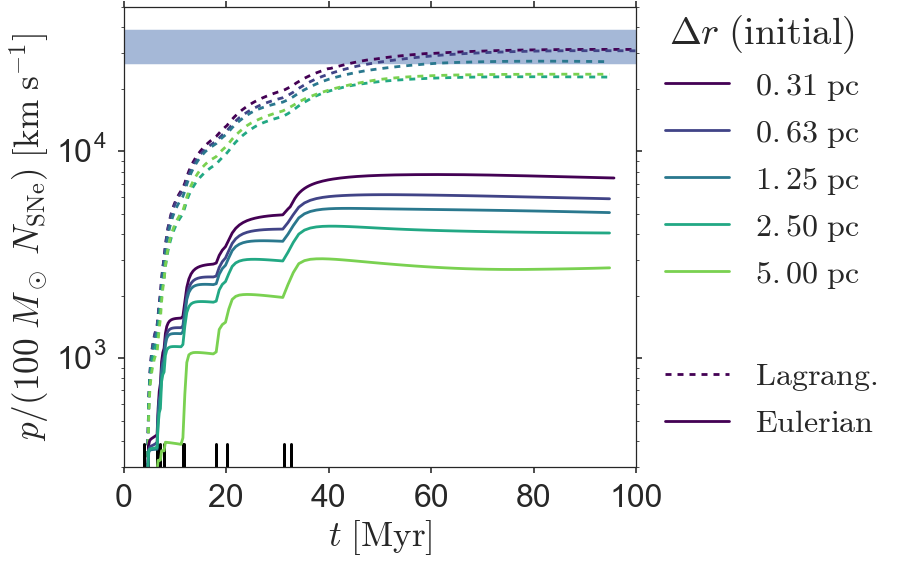

In [4]:
label_formatter = r"$\Delta r = {} $ $[\mathrm{{pc}}]$"
label_formatter = r"${}$ $\mathrm{{pc}}$"



data_dir = data_dir_default
id = "25451948-485f-46fe-b87b-f4329d03b203"
SNe_distplot(RunSummary(data_dir, id), "time", x_axis_in_Myr = True)


# plot_momentum(run_summary_hires_moving, 
#               x_axis="time", y_axis_scaling="SNe", 
#               distplot=True, clear_previous=False,
#               with_momentum_axvline=False,
#               label="Lagrangian")



##
# data_dir = "../saved_runs/resolution/10_veryveryhires_moving/"
# id = ""
# run_summary_veryveryhi_moving = RunSummary(data_dir, id)
# assert run_summary_veryveryhi_moving.is_energy_reasonable()


# plot_momentum(run_summary_veryveryhi_moving, 
#               x_axis="time", y_axis_scaling="SNe", 
#               distplot=False, clear_previous=False,
#               with_momentum_axvline=False,
#               label=label_formatter.format("0.08"),
#              )
# plt.gca().get_lines()[-1].set_linestyle("dashed")
# plt.gca().get_lines()[-1].set_label("")

##
# data_dir = "../saved_runs/resolution/10_veryhires_moving/"
# id = ""
# run_summary_veryhi_moving = RunSummary(data_dir, id)
# assert run_summary_veryhi_moving.is_energy_reasonable()

# plot_momentum(run_summary_veryhi_moving, 
#               x_axis="time", y_axis_scaling="SNe", 
#               distplot=False, clear_previous=False,
#               with_momentum_axvline=False,
#               label=label_formatter.format("0.16"),
#              )
# plt.gca().get_lines()[-1].set_linestyle("dashed")
# plt.gca().get_lines()[-1].set_label("")

##
data_dir = "../saved_runs/resolution/10_medhires_moving/"
id = ""
run_summary_medhi_moving = RunSummary(data_dir, id)
assert run_summary_medhi_moving.is_energy_reasonable()


plot_momentum(run_summary_medhi_moving, 
              x_axis="time", y_axis_scaling="SNe", 
              distplot=False, clear_previous=False,
              with_momentum_axvline=False,
              label=label_formatter.format("0.31"),
             )
plt.gca().get_lines()[-1].set_linestyle("dashed")
plt.gca().get_lines()[-1].set_label("")



##
data_dir = "../saved_runs/resolution/10_hires_moving/"
id = ""
run_summary_hi_moving = RunSummary(data_dir, id)
assert run_summary_hi_moving.is_energy_reasonable()


plot_momentum(run_summary_hi_moving, 
              x_axis="time", y_axis_scaling="SNe", 
              distplot=False, clear_previous=False,
              with_momentum_axvline=False,
              label=label_formatter.format("0.63"),
             )
plt.gca().get_lines()[-1].set_linestyle("dashed")
plt.gca().get_lines()[-1].set_label("")


##
data_dir = "../saved_runs/resolution/10_medres_moving/"
id = ""
run_summary_med_moving = RunSummary(data_dir, id)
assert run_summary_med_moving.is_energy_reasonable()


plot_momentum(run_summary_med_moving, 
              x_axis="time", y_axis_scaling="SNe", 
              distplot=False, clear_previous=False,
              with_momentum_axvline=False,
              label=label_formatter.format("1.25"),
             )
plt.gca().get_lines()[-1].set_linestyle("dashed")
plt.gca().get_lines()[-1].set_label("")

##
data_dir = "../saved_runs/resolution/10_lores_moving/"
id = ""
run_summary_lo_moving = RunSummary(data_dir, id)
assert run_summary_lo_moving.is_energy_reasonable()


plot_momentum(run_summary_lo_moving, 
              x_axis="time", y_axis_scaling="SNe", 
              distplot=False, clear_previous=False,
              with_momentum_axvline=False,
              label=label_formatter.format("2.50"),
             )
plt.gca().get_lines()[-1].set_linestyle("dashed")
plt.gca().get_lines()[-1].set_label("")

##
data_dir = "../saved_runs/resolution/10_verylores_moving/"
id = ""
run_summary_verylo_moving = RunSummary(data_dir, id)
assert run_summary_verylo_moving.is_energy_reasonable()


plot_momentum(run_summary_verylo_moving, 
              x_axis="time", y_axis_scaling="SNe", 
              distplot=False, clear_previous=False,
              with_momentum_axvline=False,
              label=label_formatter.format("5.00"),
             )
plt.gca().get_lines()[-1].set_linestyle("dashed")
plt.gca().get_lines()[-1].set_label("")



##############

##
# data_dir = "../saved_runs/resolution/10_veryveryhires_euler/"
# id = ""
# run_summary_veryveryhi = RunSummary(data_dir, id)
# assert run_summary_veryveryhi.is_energy_reasonable()


# plot_momentum(run_summary_veryveryhi, 
#               x_axis="time", y_axis_scaling="SNe", 
#               distplot=False, clear_previous=False,
#               with_momentum_axvline=False,
#               label=label_formatter.format("0.08"),
#              )

##
# data_dir = "../saved_runs/resolution/10_veryhires_euler/"
# id = ""
# run_summary_veryhi = RunSummary(data_dir, id)
# assert run_summary_veryhi.is_energy_reasonable()


# plot_momentum(run_summary_veryhi, 
#               x_axis="time", y_axis_scaling="SNe", 
#               distplot=False, clear_previous=False,
#               with_momentum_axvline=False,
#               label=label_formatter.format("0.16"),
#              )

##
data_dir = "../saved_runs/resolution/10_medhires_euler/"
id = ""
run_summary_medhi = RunSummary(data_dir, id)
assert run_summary_medhi.is_energy_reasonable()


plot_momentum(run_summary_medhi, 
              x_axis="time", y_axis_scaling="SNe", 
              distplot=False, clear_previous=False,
              with_momentum_axvline=False,
              label=label_formatter.format("0.31"),
             )



##
data_dir = "../saved_runs/resolution/10_hires_euler/"
id = ""
run_summary_hi = RunSummary(data_dir, id)
assert run_summary_hi.is_energy_reasonable()


plot_momentum(run_summary_hi, 
              x_axis="time", y_axis_scaling="SNe", 
              distplot=False, clear_previous=False,
              with_momentum_axvline=False,
              label=label_formatter.format("0.63"),
             )


##
data_dir = "../saved_runs/resolution/10_medres_euler/"
id = ""
run_summary_med = RunSummary(data_dir, id)
assert run_summary_med.is_energy_reasonable()


plot_momentum(run_summary_med, 
              x_axis="time", y_axis_scaling="SNe", 
              distplot=False, clear_previous=False,
              with_momentum_axvline=False,
              label=label_formatter.format("1.25"),
             )

##
data_dir = "../saved_runs/resolution/10_lores_euler/"
id = ""
run_summary_lo = RunSummary(data_dir, id)
assert run_summary_lo.is_energy_reasonable()


plot_momentum(run_summary_lo, 
              x_axis="time", y_axis_scaling="SNe", 
              distplot=False, clear_previous=False,
              with_momentum_axvline=False,
              label=label_formatter.format("2.50"),
             )


##
data_dir = "../saved_runs/resolution/10_verylores_euler/"
id = ""
run_summary_verylo = RunSummary(data_dir, id)
assert run_summary_verylo.is_energy_reasonable()


plot_momentum(run_summary_verylo, 
              x_axis="time", y_axis_scaling="SNe", 
              distplot=False, clear_previous=False,
              with_momentum_axvline=False,
              label=label_formatter.format("5.00"),
             )


ax = plt.gca()
num_SNe = run_summary_lo.overview.num_SNe
num_lines = int((len(ax.get_lines()) - num_SNe) / 2)
colors = [plt.cm.viridis((i)/(num_lines)) for i in range(num_lines)]
for i, color in enumerate(colors):
    ax.lines[i+num_SNe].set_color(color)
    ax.lines[i+num_SNe+num_lines].set_color(color)



plt.xlim(xmax=100)

# plt.yscale("linear")
# plt.ylim(0, 35000)

plt.yscale("log")
plt.ylim(300, 50000)

res_legend = plt.legend(loc="upper left", bbox_to_anchor=(1, 1.05), title=r"$\Delta r$ $(\mathrm{initial})$")
ax.add_artist(res_legend)

res_legend = plt.legend([ax.get_lines()[num_SNe],ax.get_lines()[num_SNe+num_lines]], 
                        [r"$\mathrm{Lagrang.}$", r"$\mathrm{Eulerian}$ "],
#                         title=r"$\mathrm{Mesh}$",
                        loc="lower left", bbox_to_anchor=(1, 0))

percentiles = Bayesian_fit.generate_predictive_percentiles(
    np.array([run_summary_medhi_moving.overview.metallicity]),
    np.array([run_summary_medhi_moving.overview.background_density]),
    np.array([run_summary_medhi_moving.overview.num_SNe])
).flatten()

plt.axhspan(percentiles[1], percentiles[3], color="#a5b8d7")


plt.tight_layout(rect=(0,0,.8, 1))
plot_filename = os.path.join(plots_dir,
                             "momentum_evolution-10-SNe-resolution-full")
plt.savefig(plot_filename + ".eps")
plt.savefig(plot_filename + ".pdf")
plt.savefig(plot_filename + ".png")

In [5]:
N_SNe = run_summary_lo_moving.overview.num_SNe
print("very lo: ", run_summary_verylo_moving.momentum.max() / (100* M_solar * N_SNe * 100 * 1000))
print("lo: ", run_summary_lo_moving.momentum.max() / (100* M_solar * N_SNe * 100 * 1000))
print("med: ", run_summary_med_moving.momentum.max() / (100* M_solar * N_SNe * 100 * 1000))
print("hi: ", run_summary_hi_moving.momentum.max() / (100* M_solar * N_SNe * 100 * 1000))
print("medhi: ", run_summary_medhi_moving.momentum.max() / (100* M_solar * N_SNe * 100 * 1000))

very lo:  23617.8411981
lo:  22958.7036476
med:  27300.7517278
hi:  30690.6238261
medhi:  31128.8342434


In [6]:
resolutions_moving = [
    run_summary_verylo_moving.df.iloc[0].dR,
    run_summary_lo_moving.df.iloc[0].dR,
    run_summary_med_moving.df.iloc[0].dR,
    run_summary_hi_moving.df.iloc[0].dR,
    run_summary_medhi_moving.df.iloc[0].dR,
]

resolutions_euler = [
    run_summary_verylo.df.iloc[0].dR,
    run_summary_lo.df.iloc[0].dR,
    run_summary_med.df.iloc[0].dR,
    run_summary_hi.df.iloc[0].dR,
    run_summary_medhi.df.iloc[0].dR,
]

momenta_moving = [
    run_summary_verylo_moving.momentum.max(),
    run_summary_lo_moving.momentum.max(),
    run_summary_med_moving.momentum.max(),
    run_summary_hi_moving.momentum.max(),
    run_summary_medhi_moving.momentum.max(),
]

momenta_euler = [
    run_summary_verylo.momentum.max(),
    run_summary_lo.momentum.max(),
    run_summary_med.momentum.max(),
    run_summary_hi.momentum.max(),
    run_summary_medhi.momentum.max(),
]

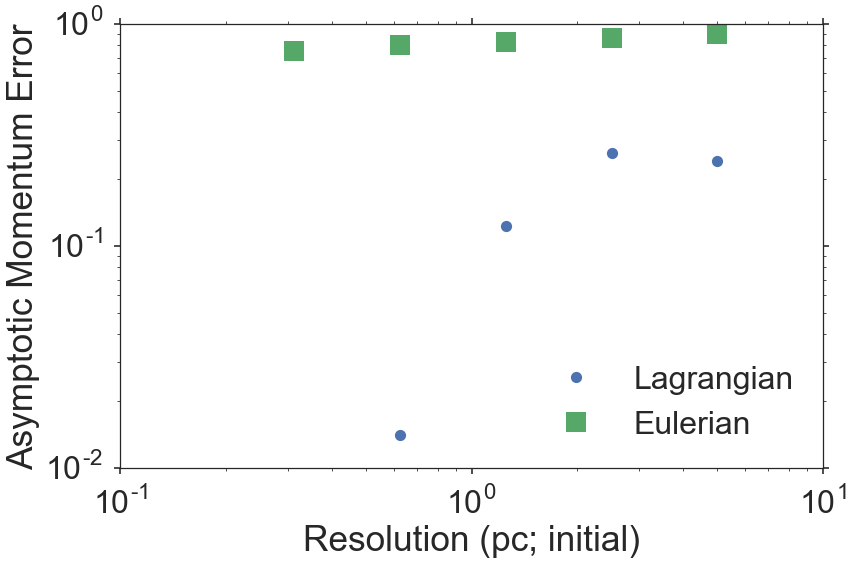

In [9]:
momentum_reference = max(momenta_moving)
plt.plot(resolutions_moving, np.abs(1-momenta_moving / momentum_reference),
         linestyle="", marker="o", label="Lagrangian")
plt.plot(resolutions_euler, np.abs(1- momenta_euler / momentum_reference),
         linestyle="", marker="s", markersize=20, label="Eulerian")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Resolution (pc; initial)")
plt.ylabel("Asymptotic Momentum Error")
plt.legend(loc="best")
plt.tight_layout()
plt.savefig("momentum-error.png")

## Many SNe

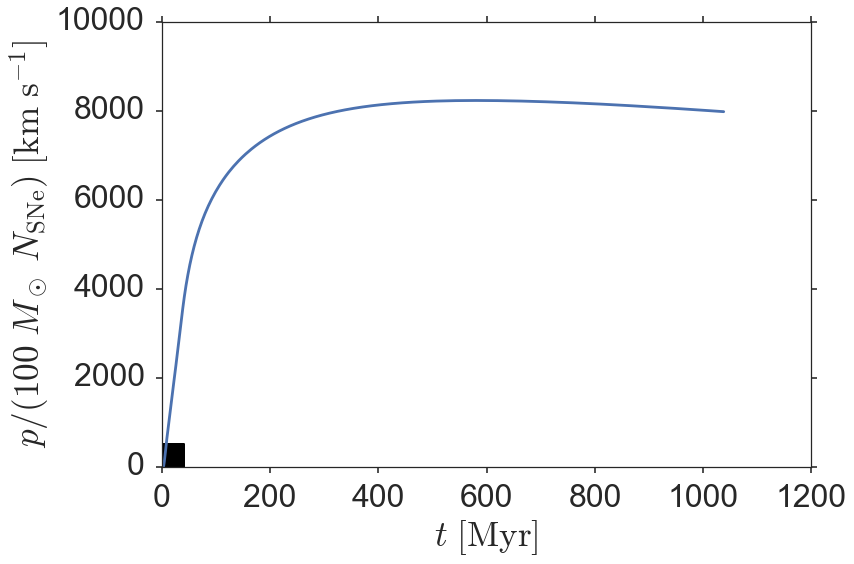

In [6]:
# data_dir = data_dir_default

# id = "53c43e6e-1b48-4f96-bd93-1bf18ad5e25c"

# run_summary = RunSummary(data_dir, id)

# plot_momentum(run_summary, x_axis="time", y_axis_scaling="SNe", distplot=True, clear_previous=True)

# plt.ylim(ymax=10000)

# plt.tight_layout()
# plot_filename = os.path.join(plots_dir, "momentum_evolution-many-SNe")
# plt.savefig(plot_filename + ".eps")
# plt.savefig(plot_filename + ".pdf")
# plt.savefig(plot_filename + ".png")

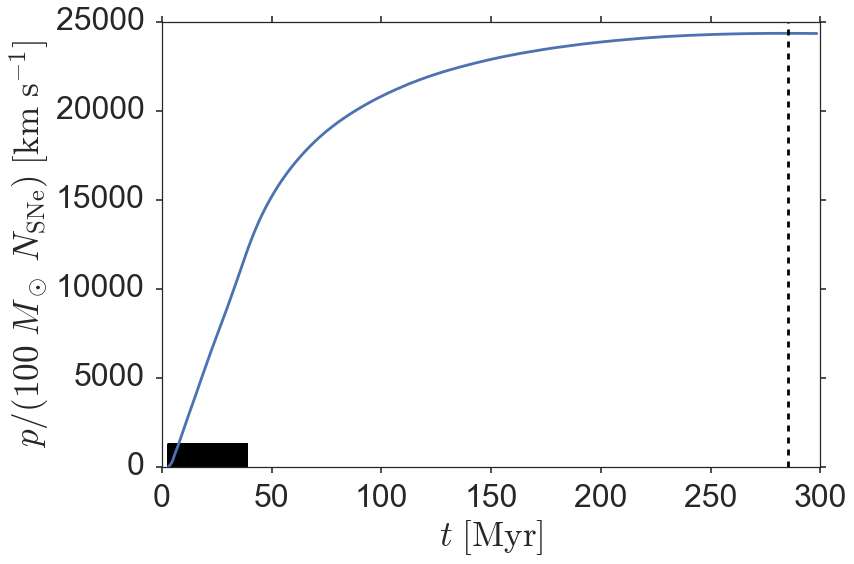

In [15]:
data_dir = data_dir_default

id = "a7bc1f23-aff9-4dcf-9705-03ae1f8e2507"

run_summary = RunSummary(data_dir, id)

plot_momentum(run_summary, x_axis="time", y_axis_scaling="SNe", distplot=True, clear_previous=True)

plt.tight_layout()
plot_filename = os.path.join(plots_dir, "momentum_evolution-many-SNe")
plt.savefig(plot_filename + ".eps")
plt.savefig(plot_filename + ".pdf")
plt.savefig(plot_filename + ".png")

# Structure
## Many SNe

In [2]:
data_dir = data_dir_default

id = "a7bc1f23-aff9-4dcf-9705-03ae1f8e2507"

run_summary = RunSummary(data_dir, id)

### Last SN

E_kin:  2.85e+50
E_int:  7.15e+50
checkpoint:  ../saved_runs/cluster_parameter_study/a7bc1f23-aff9-4dcf-9705-03ae1f8e2507_checkpoint_0069.dat
time:                       3.83e+07 [yr] 	 1.21e+15 [s]
time elapsed:               3.53e+07 [yr] 	 1.11e+15 [s]
background_density:         2.22e-24
Cluster mass:               1.00e+05 M_sol
Number of SNe so far:       1008
mass loss prescription:     uniform


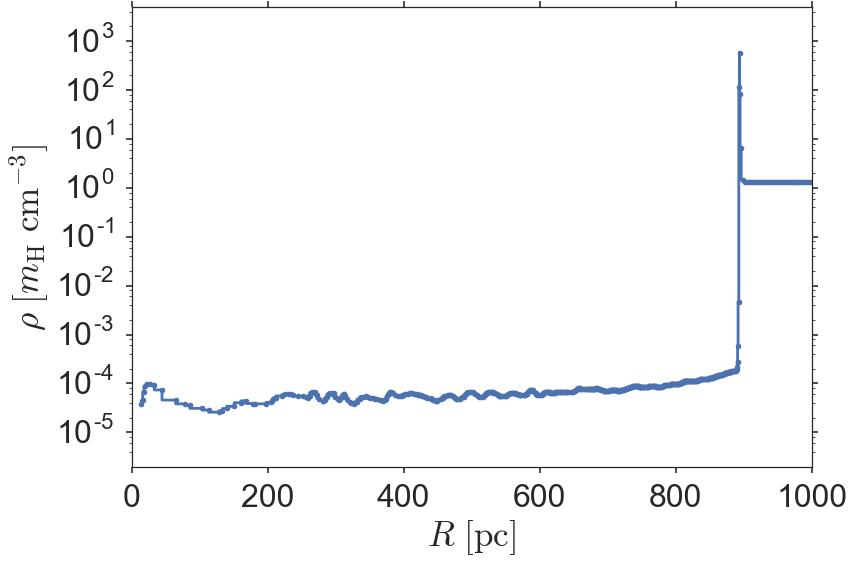

In [3]:
# data_dir = data_dir_default

# id = "a7bc1f23-aff9-4dcf-9705-03ae1f8e2507"

# run_summary = RunSummary(data_dir, id)


last_SNe_index = np.searchsorted(run_summary.times, run_summary.overview.SNe_times.max())

sedov_solution = SedovSolution(1e51, 
                               run_summary.overview.background_density, 
                               run_summary.overview.metallicity)
i = last_SNe_index
plotter(run_summary,
        sedov_solution,
        xlim = (0,1000),
        checkpoint_index = i,
        density_in_mH_cm3 = True
        )

plt.legend(loc="best")
plt.gca().legend_.remove()

# title = r"$t = {0:.0f}$ $\mathrm{{Myr}}$".format(run_summary.times[i] / (1e6*yr))


# plt.title(title)
plt.tight_layout()


plot_filename = os.path.join(plots_dir, "structure-many-last-SN")
plt.savefig(plot_filename + ".eps")
plt.savefig(plot_filename + ".pdf")
plt.savefig(plot_filename + ".png")

In [4]:
run_summary.R_shock[last_SNe_index] / pc / (run_summary.overview.num_SNe)**.2

226.22343740008986

### Peak Momentum

E_kin:  2.85e+50
E_int:  7.15e+50
checkpoint:  ../saved_runs/cluster_parameter_study/a7bc1f23-aff9-4dcf-9705-03ae1f8e2507_checkpoint_0287.dat
time:                       2.85e+08 [yr] 	 9.00e+15 [s]
time elapsed:               2.82e+08 [yr] 	 8.90e+15 [s]
background_density:         2.22e-24
Cluster mass:               1.00e+05 M_sol
Number of SNe so far:       1008
mass loss prescription:     uniform


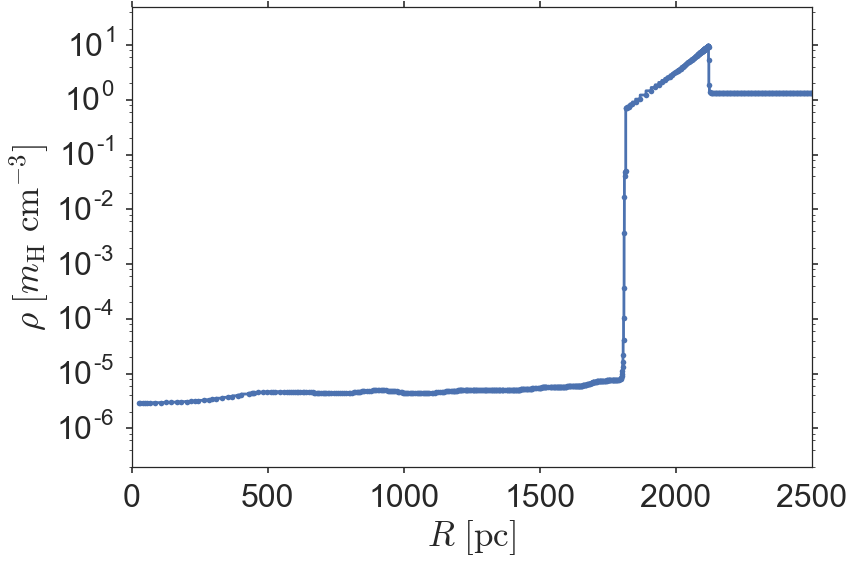

In [5]:
# data_dir = data_dir_default

# id = "a7bc1f23-aff9-4dcf-9705-03ae1f8e2507"

# run_summary = RunSummary(data_dir, id)


peak_momentum_index = np.argmax(run_summary.momentum)


sedov_solution = SedovSolution(1e51, 
                               run_summary.overview.background_density, 
                               run_summary.overview.metallicity)
i = peak_momentum_index
plotter(run_summary,
        sedov_solution,
        xlim = (0,2500),
        checkpoint_index = i,
        density_in_mH_cm3 = True
        )

# plt.legend(loc="best")
plt.gca().legend_.remove()

# title = r"$t = {0:.0f}$ $\mathrm{{Myr}}$".format(run_summary.times[i] / (1e6*yr))


# plt.title(title)
plt.tight_layout()


plot_filename = os.path.join(plots_dir, "structure-many-peak-momentum")
plt.savefig(plot_filename + ".eps")
plt.savefig(plot_filename + ".pdf")
plt.savefig(plot_filename + ".png")

# Energy Evolution

## Many SNe

In [29]:
data_dir = data_dir_default

id = "a7bc1f23-aff9-4dcf-9705-03ae1f8e2507"

run_summary = RunSummary(data_dir, id)

energies_radiated_net = get_energies_radiated_net(run_summary)
SNe_so_far = np.array([(time >= run_summary.overview.SNe_times).sum()
                       for time in run_summary.times])



In [30]:
run_summary.overview.SNe_times.size

1008

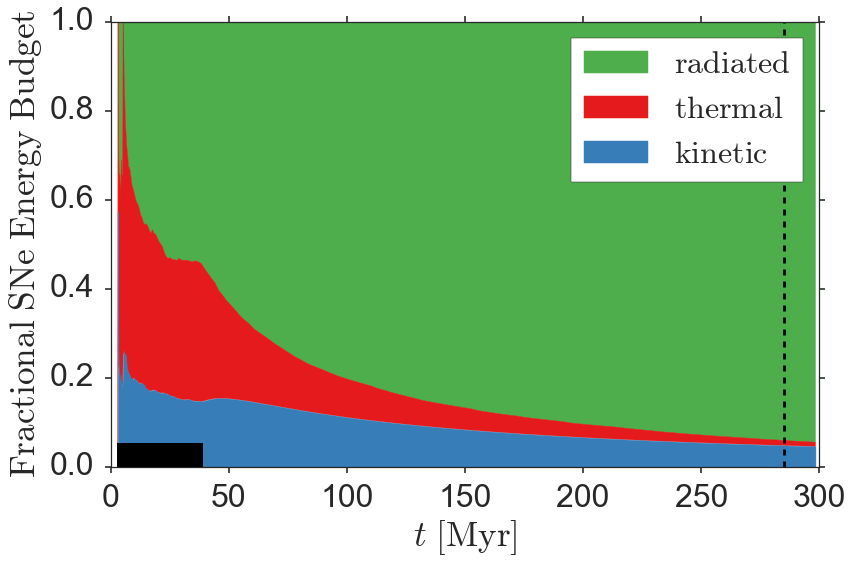

In [35]:
plot_energy_budget(run_summary)
plt.xlim(xmax=300)

plt.tight_layout()
plot_filename = os.path.join(plots_dir, "energy_evolution-1000-SNe")
plt.savefig(plot_filename + ".eps")
plt.savefig(plot_filename + ".pdf")
plt.savefig(plot_filename + ".png")

In [32]:
i_30_Myr = np.searchsorted(run_summary.times, 30e6 * yr)
print(run_summary.E_R_kin[i_30_Myr] / (SNe_so_far[i_30_Myr] * 1e51))
print(1- \
      (energies_radiated_net[i_30_Myr]+run_summary.E_R_kin[i_30_Myr]) \
          /(1e51*SNe_so_far[i_30_Myr]))

0.150510043874
0.313030070993


In [33]:
i_momentum_max = run_summary.momentum.argmax()
print(run_summary.E_R_kin[i_momentum_max] / (SNe_so_far[i_momentum_max] * 1e51))
print(1- \
      (energies_radiated_net[i_momentum_max]+run_summary.E_R_kin[i_momentum_max]) \
          /(1e51*SNe_so_far[i_momentum_max]))

0.0475416065923
0.0111456573575


In [34]:
run_summary.overview.background_density / m_proton

1.3299998445554346

## 10 SNe

In [24]:
data_dir = data_dir_default

id = "25451948-485f-46fe-b87b-f4329d03b203"

run_summary = RunSummary(data_dir, id)

energies_radiated_net = get_energies_radiated_net(run_summary)
SNe_so_far = np.array([(time >= run_summary.overview.SNe_times).sum()
                       for time in run_summary.times])



In [25]:
run_summary.overview.SNe_times.size

11

In [26]:
run_summary.df.dR.iloc[0]

0.62629353024663958

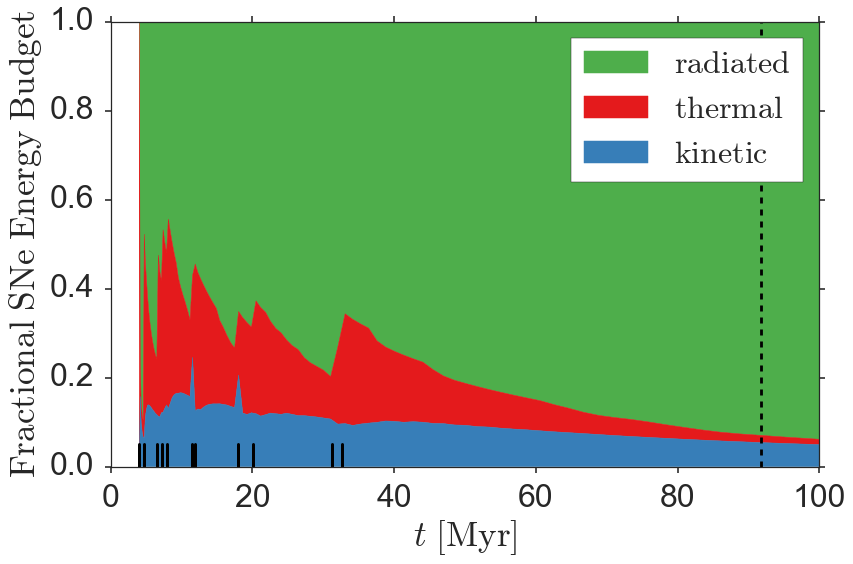

In [27]:
plot_energy_budget(run_summary)
plt.xlim(xmax=100)

plt.tight_layout()
plot_filename = os.path.join(plots_dir, "energy_evolution-10-SNe")
plt.savefig(plot_filename + ".eps")
plt.savefig(plot_filename + ".pdf")
plt.savefig(plot_filename + ".png")

In [37]:
i_30_Myr = np.searchsorted(run_summary.times, 30e6 * yr)
print("Kinetic fraction at 30 Myr: {:.1f}%".format(100*run_summary.E_R_kin[i_30_Myr] / (SNe_so_far[i_30_Myr] * 1e51)))
print("Thermal fraction at 30 Myr: {:.1f}%".format(100*(1- \
      (energies_radiated_net[i_30_Myr]+run_summary.E_R_kin[i_30_Myr]) \
          /(1e51*SNe_so_far[i_30_Myr]))))

Kinetic fraction at 30 Myr: 10.9%
Thermal fraction at 30 Myr: 10.7%


In [38]:
i_40_Myr = np.searchsorted(run_summary.times, 40e6 * yr)
print("Kinetic fraction at 40 Myr: {:.1f}%".format(100*run_summary.E_R_kin[i_40_Myr] / (SNe_so_far[i_40_Myr] * 1e51)))
print("Thermal fraction at 40 Myr: {:.1f}%".format(100*(1- \
      (energies_radiated_net[i_40_Myr]+run_summary.E_R_kin[i_40_Myr]) \
          /(1e51*SNe_so_far[i_40_Myr]))))

Kinetic fraction at 40 Myr: 10.2%
Thermal fraction at 40 Myr: 15.7%


In [39]:
i_peak_momentum = run_summary.momentum.argmax()
print("Kinetic fraction at peak_momentum: {:.1f}%".format(100*run_summary.E_R_kin[i_peak_momentum] / (SNe_so_far[i_peak_momentum] * 1e51)))
print("Thermal fraction at peak_momentum: {:.1f}%".format(100*(1- \
      (energies_radiated_net[i_peak_momentum]+run_summary.E_R_kin[i_peak_momentum]) \
          /(1e51*SNe_so_far[i_peak_momentum]))))

Kinetic fraction at peak_momentum: 5.4%
Thermal fraction at peak_momentum: 1.6%


In [40]:
run_summary.momentum.max() \
    / (100 * M_solar * run_summary.overview.num_SNe * 100 * 1000)

30690.623826075429

### Low resolution + Eulerian

In [12]:
data_dir = "../saved_runs/resolution/10_lores_euler/"
id = ""
run_summary_lores_euler = RunSummary(data_dir, id)
run_summary_lores_euler.is_energy_reasonable()

True

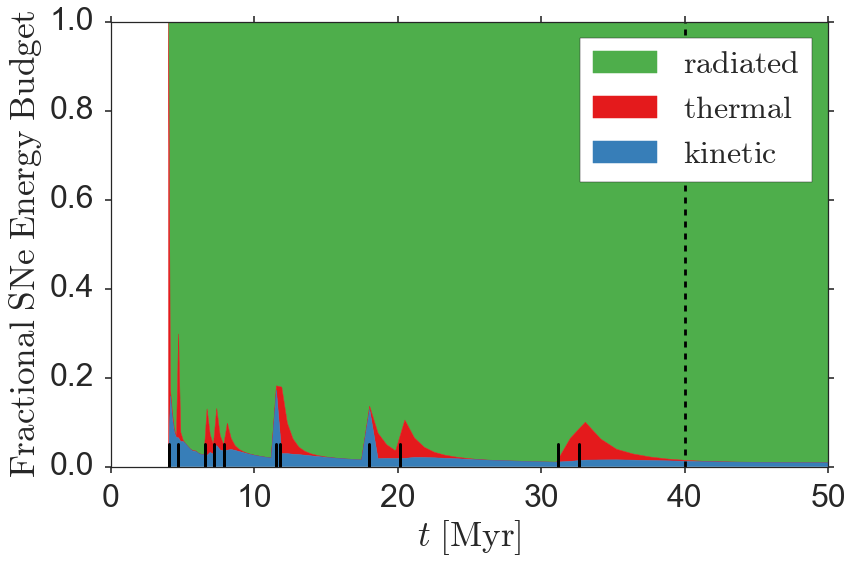

In [29]:
plot_energy_budget(run_summary_lores_euler)
plt.xlim(xmax=50)

plt.tight_layout()
plot_filename = os.path.join(plots_dir, "energy_evolution-10-SNe-lowres")
plt.savefig(plot_filename + ".eps")
plt.savefig(plot_filename + ".pdf")
plt.savefig(plot_filename + ".png")

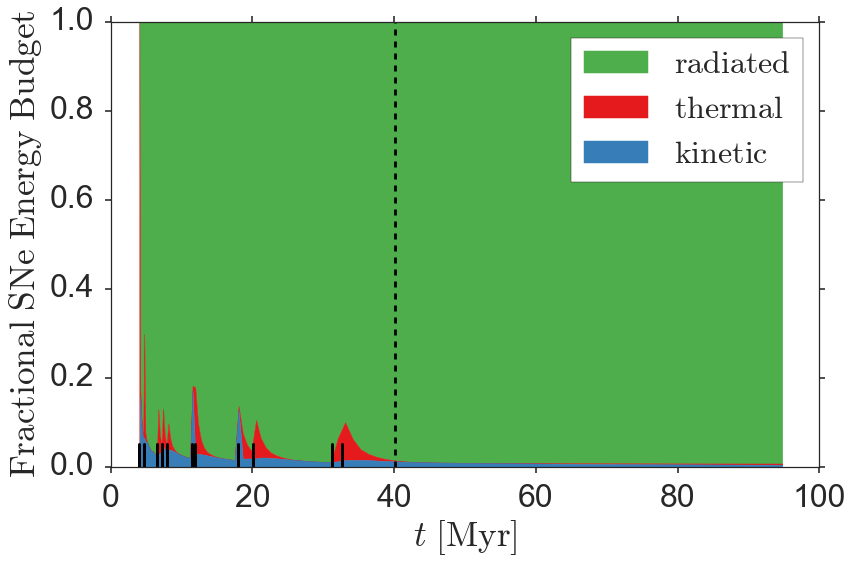

In [13]:
plot_energy_budget(run_summary_lores_euler)
plt.xlim(xmax=100)

plt.tight_layout()
plot_filename = os.path.join(plots_dir, "energy_evolution-10-SNe-lowres-extended")
plt.savefig(plot_filename + ".eps")
plt.savefig(plot_filename + ".pdf")
plt.savefig(plot_filename + ".png")

In [45]:
energies_radiated_net_lores_euler = get_energies_radiated_net(run_summary_lores_euler)
SNe_so_far_lores_euler = np.array([(time >= run_summary_lores_euler.overview.SNe_times).sum()
                       for time in run_summary_lores_euler.times])

In [46]:
i_30_Myr = np.searchsorted(run_summary_lores_euler.times, 30e6 * yr)
i_30_Myr = min(i_30_Myr, run_summary_lores_euler.times.size-1)
print("Kinetic fraction at 30 Myr: {:.1f}%".format(100*run_summary_lores_euler.E_R_kin[i_30_Myr] / (SNe_so_far_lores_euler[i_30_Myr] * 1e51)))
print("Thermal fraction at 30 Myr: {:.1f}%".format(100*(1- \
      (energies_radiated_net_lores_euler[i_30_Myr]+run_summary_lores_euler.E_R_kin[i_30_Myr]) \
          /(1e51*SNe_so_far_lores_euler[i_30_Myr]))))

Kinetic fraction at 30 Myr: 1.1%
Thermal fraction at 30 Myr: -0.2%


In [47]:
i_40_Myr = np.searchsorted(run_summary_lores_euler.times, 40e6 * yr)
i_40_Myr = min(i_40_Myr, run_summary_lores_euler.times.size-1)
print("Kinetic fraction at 40 Myr: {:.1f}%".format(100*run_summary_lores_euler.E_R_kin[i_40_Myr] / (SNe_so_far_lores_euler[i_40_Myr] * 1e51)))
print("Thermal fraction at 40 Myr: {:.1f}%".format(100*(1- \
      (energies_radiated_net_lores_euler[i_40_Myr]+run_summary_lores_euler.E_R_kin[i_40_Myr]) \
          /(1e51*SNe_so_far_lores_euler[i_40_Myr]))))

Kinetic fraction at 40 Myr: 1.2%
Thermal fraction at 40 Myr: 0.2%


In [48]:
i_peak_momentum = run_summary_lores_euler.momentum.argmax()
print("Kinetic fraction at peak_momentum: {:.1f}%".format(100*run_summary_lores_euler.E_R_kin[i_peak_momentum] / (SNe_so_far_lores_euler[i_peak_momentum] * 1e51)))
print("Thermal fraction at peak_momentum: {:.1f}%".format(100*(1- \
      (energies_radiated_net_lores_euler[i_peak_momentum]+run_summary_lores_euler.E_R_kin[i_peak_momentum]) \
          /(1e51*SNe_so_far_lores_euler[i_peak_momentum]))))

Kinetic fraction at peak_momentum: 1.2%
Thermal fraction at peak_momentum: 0.2%


# Sedov Verification

In [14]:
"{:e}".format(run_summary.overview.background_density / (1.33 * m_proton))

'9.999999e-04'

In [15]:
"{:e}".format(run_summary.overview.metallicity / (metallicity_solar))

'1.000000e+00'

E_kin:  2.85e+50
E_int:  7.15e+50
checkpoint:  ../saved_runs/cluster_parameter_study/01b35950-99b7-49cd-8a85-e8ad5fbafa70_checkpoint_0002.dat
time:                       7.79e+06 [yr] 	 2.46e+14 [s]
time elapsed:               1.69e+05 [yr] 	 5.35e+12 [s]
energy conserved to:        -1.08e-02
E_kin    accurate to:       5.51e-03
momentum accurate to:       2.09e-03
Peak luminosity at checkpoint 16
Peak luminosity at t_0 =    9.09e+06 [yr]
t_f = 13 * t_0 =            1.18e+08 [yr]
R_shock =                   166.33 [pc]
E_R_tot =                   1.00e+51 [ergs]
background_density:         2.22e-27
Cluster mass:               1.00e+02 M_sol
Number of SNe so far:       1
mass loss prescription:     uniform


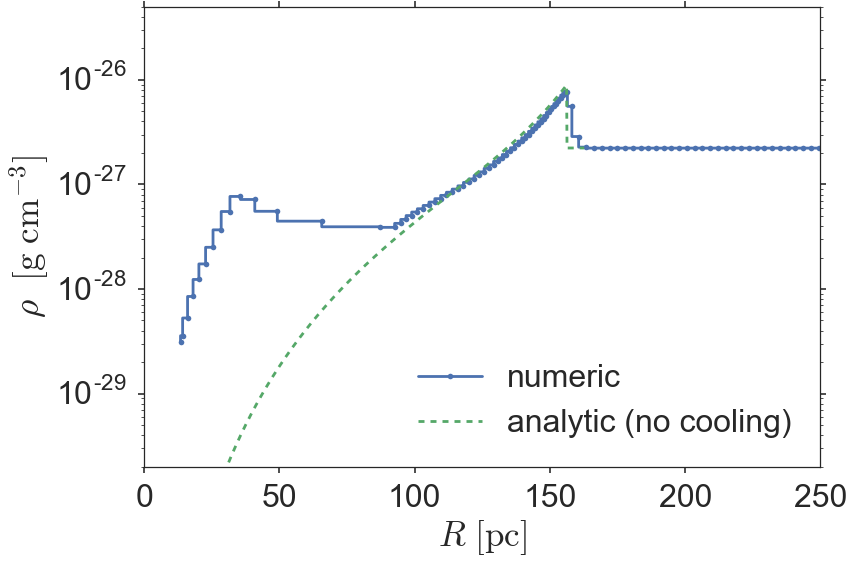

In [16]:
data_dir = data_dir_default
id = "01b35950-99b7-49cd-8a85-e8ad5fbafa70"
run_summary = RunSummary(data_dir=data_dir, id=id)

sedov_solution = SedovSolution(1e51, 
                               run_summary.overview.background_density, 
                               run_summary.overview.metallicity)
i = 2
plotter(run_summary,
        sedov_solution,
        xlim = (0,250),
        checkpoint_index = i
        )
# turn sedov into dashed line
a = plt.gca()
l = a.lines[1]
l.set_linestyle("--")
plt.legend(loc="best")

# title = r"$t = " + parse_into_scientific_notation((run_summary.times[i] - run_summary.times[0]) / yr) + r"$ $ \mathrm{yr}$"

# plt.title(title)
plt.tight_layout()


plot_filename = os.path.join(plots_dir, "verification_Sedov")
plt.savefig(plot_filename + ".eps")
plt.savefig(plot_filename + ".pdf")
plt.savefig(plot_filename + ".png")

# Thornton Verification

In [2]:
from clustered_SNe.analysis.thornton_helpers import ThorntonParameterStudy

data_dir = "../saved_runs/thornton"
thornton_parameter_study = ThorntonParameterStudy(data_dir)

<IPython.core.display.Math object>

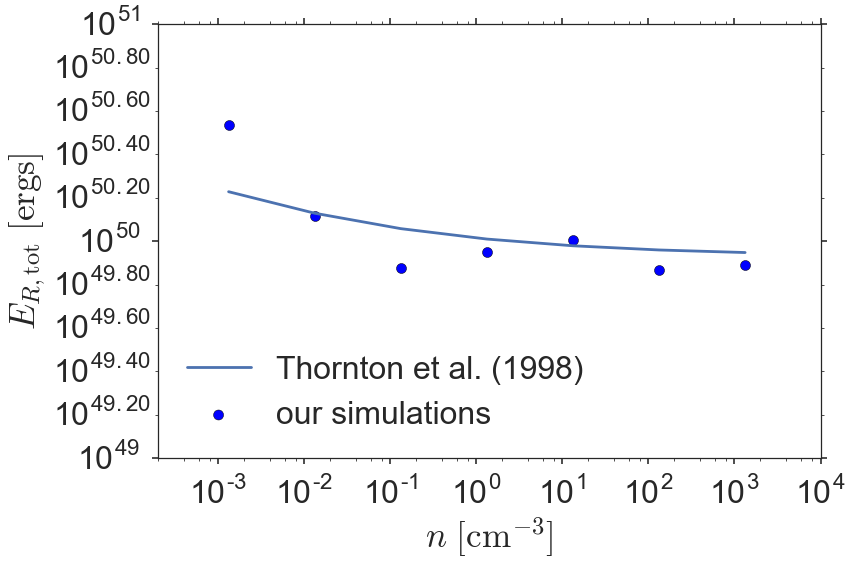

In [6]:
plt.figure()
thornton_parameter_study.plot_one_number_density(energy="tot")

a = plt.gca()

l_1 = a.lines[1]
l_2 = a.lines[2]

l_1.remove()
l_2.remove()

plt.xlim(xmax=1e4)

plt.legend(loc="lower left")

plt.tight_layout()

plot_filename = os.path.join(plots_dir, "verification_Thornton_density")
plt.savefig(plot_filename + ".eps")
plt.savefig(plot_filename + ".pdf")
plt.savefig(plot_filename + ".png")

<IPython.core.display.Math object>

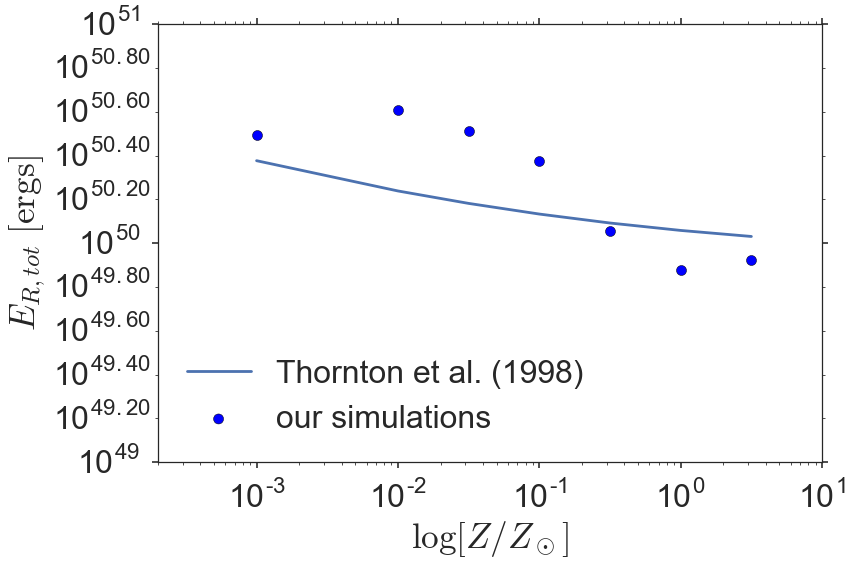

In [5]:
plt.figure()
thornton_parameter_study.plot_one_metallicity(energy="tot")

a = plt.gca()

l_1 = a.lines[1]
l_2 = a.lines[2]

l_1.remove()
l_2.remove()

plt.xlim(xmax=10)

plt.legend(loc="lower left")

plt.tight_layout()

plot_filename = os.path.join(plots_dir, "verification_Thornton_metallicity")
plt.savefig(plot_filename + ".eps")
plt.savefig(plot_filename + ".pdf")
plt.savefig(plot_filename + ".png")

# Tables

In [2]:
status_to_flag_map = {"Complete":0,
                      "Ready":0,
                      "Error":1,
                      "Unphysical":1,
                      "Running":0,
                      "Unknown":0}

## $\mathrm{\LaTeX}$

I still need to filter these based on their status (esp. unphysical ones!)

In [3]:
df = pd.read_sql_table("simulations", "sqlite:///" + database_filename)
df.sort_values(["background_density", "metallicity", "cluster_mass", "num_SNe", "id"],
               inplace=True)

filename = "plots_for_paper/tables/results.stub.deluxetable.tex"
with open(filename, mode="w") as file:
    print(r"\begin{deluxetable*}{cccrllrrllr}", file=file)
    print(r"\tablecolumns{10}", file=file)
    print(r"\tablewidth{0pc}", file=file)
    print(r"% \tabletypesize{\scriptsize}", file=file)
    print(r"\tablecaption{Numeric Results \label{tab:results} }", file=file)
    print(r"\tablehead{", file=file)
    print(r"\colhead{$\rho$} & \colhead{$Z$} & \colhead{$M_\mathrm{cluster}$} & \colhead{$N_\mathrm{SNe}$}"
              + r"& \colhead{$p$} &  \colhead{$t$}& \colhead{$R$} & \colhead{$M_R$} "
              + r"& \colhead{$E_{R, kin}$} & \colhead{$E_{R, int}$} & \colhead{flag}" + r"\\", file=file)
    print(r"\colhead{(1.33 $m_\mathrm{H}$ cm$^{-3}$)} & \colhead{($Z_\odot$)} & \colhead{($M_\odot$)} & \colhead{} "
              + r"& \colhead{(g cm s$^{-1}$)} & \colhead{(yr)} & \colhead{(pc)} "
              + r"& \colhead{($M_\odot$)} & \colhead{(ergs)} & \colhead{(ergs)} & \colhead{}  }", file=file)
    print(r"\startdata", file=file)
    
    i = 0
    for i, (index, simulation) in enumerate(df.iterrows()):
        if i >= 5:
            break
        simulation_status = session.query(Simulation_Status).get(simulation.id)
        print(
              r"$10^{{{0:+}}}$ ".format(int(np.log10(simulation.background_density/m_proton/1.33))),
              r"$ 10^{{{:+.2}}}$ ".format(np.log10(simulation.metallicity/metallicity_solar)),
              r"$10^{{{:.2}}}$ ".format(np.log10(simulation.cluster_mass/M_solar)),
              r"{0} ".format(simulation.num_SNe),
              r"$ " + parse_into_scientific_notation(simulation.momentum) + "$",
              r"$ " + parse_into_scientific_notation(simulation.t / yr) + "$",
              r"$ " + parse_into_scientific_notation(simulation.R / pc) + "$",
              r"$ " + parse_into_scientific_notation(simulation.M_R / M_solar) + "$",
              r"$ " + parse_into_scientific_notation(simulation.E_R_kin) + "$",
              r"$ " + parse_into_scientific_notation(simulation.E_R_int) + "$ ",
              status_to_flag_map[simulation_status.status],
              sep=" & ",
              end=r" \\" + "\n",
              file=file)
    print(r"\enddata", file=file)
    print(r"""\tablecomments{The table shown here is only a stub;
    it is provided in its entirety as a Machine-Readable Table.}""",file=file)
    print(r"\end{deluxetable*}", file=file)


In [4]:
df = pd.read_sql_table("simulations", "sqlite:///" + database_filename)
df.sort_values(["background_density", "metallicity", "cluster_mass", "num_SNe", "id"],
               inplace=True)

filename = "plots_for_paper/tables/results.stub.table.tex"
with open(filename, mode="w") as file:
    print(r"\begin{table*}", file=file)
#     print(r"\tablecolumns{10}", file=file)
#     print(r"\tablewidth{0pc}", file=file)
#     print(r"% \tabletypesize{\scriptsize}", file=file)
    print(r"\caption{Numeric Results. The table shown here is only a stub; it is provided in its entirety as a Machine-Readable Table.}", file=file)
    print(r"\label{tab:results}", file=file)
    print(r"\begin{tabular}{cccrllrrllr}", file=file)
#     print(r"\tablecaption{Numeric Results \label{tab:results} }", file=file)
#     print(r"\tablehead{", file=file)
    print(r"$\rho$ & $Z$ & $M_\mathrm{cluster}$ & $N_\mathrm{SNe}$ "
              + "& $p$ &  $t$ & $R$ & $M_R$ "
              + "& $E_{R, \mathrm{kin}}$ & $E_{R, \mathrm{int}}$ & flag" + r"\\", file=file)
    print(r"(1.33 $m_\mathrm{H}$ cm$^{-3}$) & ($Z_\odot$) & ($M_\odot$) &  "
              + r"& (g cm s$^{-1}$) & (yr) & (pc) "
              + r"& ($M_\odot$) & (ergs) & (ergs) &  \\", file=file)
#     print(r"\startdata", file=file)
    print(r"\hline", file=file)
    
    i = 0
    for i, (index, simulation) in enumerate(df.iterrows()):
        if i >= 5:
            break
        simulation_status = session.query(Simulation_Status).get(simulation.id)
        print(
              r"$10^{{{0:+}}}$ ".format(int(np.log10(simulation.background_density/m_proton/1.33))),
              r"$ 10^{{{:+.2}}}$ ".format(np.log10(simulation.metallicity/metallicity_solar)),
              r"$10^{{{:.2}}}$ ".format(np.log10(simulation.cluster_mass/M_solar)),
              r"{0} ".format(simulation.num_SNe),
              r"$ " + parse_into_scientific_notation(simulation.momentum) + "$",
              r"$ " + parse_into_scientific_notation(simulation.t / yr) + "$",
              r"$ " + parse_into_scientific_notation(simulation.R / pc) + "$",
              r"$ " + parse_into_scientific_notation(simulation.M_R / M_solar) + "$",
              r"$ " + parse_into_scientific_notation(simulation.E_R_kin) + "$",
              r"$ " + parse_into_scientific_notation(simulation.E_R_int) + "$ ",
              status_to_flag_map[simulation_status.status],
              sep=" & ",
              end=r" \\" + "\n",
              file=file)
#     print(r"\enddata", file=file)
#     print(r"""\tablecomments{The table shown here is only a stub;
#     it is provided in its entirety as a Machine-Readable Table.}""",file=file)
    print(r"\end{tabular}", file=file)
    print(r"\end{table*}", file=file)


Add a "Table notes" about this being a stub. For example, the AAS website provides:

"Table X is published in its entirety in a machine readable format <>, A portion is shown here for guidance regarding its form and content."

## Machine-readable
(Edit the description + check for all the other fields which need to be updated)

In [5]:
df = pd.read_sql_table("simulations", "sqlite:///" + database_filename)
df.sort_values(["background_density", "metallicity", "cluster_mass", "num_SNe", "id"],
               inplace=True)

filename_data = "plots_for_paper/tables/results.dat"
with open(filename_data, mode="w") as file:
    
    for i, (index, simulation) in enumerate(df.iterrows()):
#         if i >= 5:
#             break
        simulation_status = session.query(Simulation_Status).get(simulation.id)
#         if i!=0:
#             print("", file=file)
        print(
              r"{0:+13.6e}".format(simulation.background_density / (kg / meters**3)),
              r"{0:+13.6e}".format(simulation.metallicity/metallicity_solar),
              r"{0:+13.6e}".format(simulation.cluster_mass / kg),
              r"{0:04d}".format(simulation.num_SNe),
              r"{0:+13.6e}".format(simulation.momentum / meters / kg),
              r"{0:+13.6e}".format(simulation.R / meters),
              r"{0:+13.6e}".format(simulation.t),
              r"{0:+13.6e}".format(simulation.M_R / kg),
              r"{0:+13.6e}".format(simulation.E_R_kin / joules),
              r"{0:+13.6e}".format(simulation.E_R_int / joules),
              r"{0:d}".format(status_to_flag_map[simulation_status.status]),
              sep=" ",
#               end=r"" + "\n",
              file=file)
        
sample_line = open(filename_data).readline()
        
filename_readme = "plots_for_paper/tables/ReadMe"
with open(filename_readme, mode="w") as file:
    data = """J/MNRAS/vol/page     Clustered SNe     (Gentry, 2016)
================================================================================
Enhanced Momentum Feedback from Clustered Supernovae
     Gentry, Eric S.
     Krumholz, Mark R.
     Dekel, Avishai
     Madau, Piero
   <Mon. Not. R. Astron. Soc., vol, page (2016)>
================================================================================
Keywords: ISM: bubbles -- ISM: supernova remnants -- hydrodynamics

Description:
    Key parameters, extracted from every simulation after all SN have occured
    and the momentum has reached a maximum.

File Summary:
--------------------------------------------------------------------------------
  FileName   Lrecl  Records   Explanations
--------------------------------------------------------------------------------
ReadMe          80        .   This file
{0:12}   {1}      {2}   SNe simulation results
--------------------------------------------------------------------------------

Byte-by-byte Description of file: {0}
--------------------------------------------------------------------------------
   Bytes Format Units  Label        Explanations
--------------------------------------------------------------------------------
   1- 13 E13.6  kg/m3    Density      Initial gas density
  15- 27 E13.6  ---      Metallicity  Initial gas metallicity
  29- 41 E13.6  kg       Mcluster     Cluster mass
  43- 46 I4     ---      NSNe         Number of SNe
  48- 60 E13.6  kg.m/s   Momentum     Peak momentum
  62- 74 E13.6  s        Time         Time of peak momentum
  76- 88 E13.6  m        Rad          SNR radius at time of peak momentum
  90-102 E13.6  kg       Mremnant     SNR mass at peak momentum
 104-116 E13.6  J        Eremnantkin  SNR kinetic energy at peak momentum
 118-130 E13.6  J        Eremnantint  SNR internal energy at peak momentum
 132-132 I1     ---      Flag         Simulation data quality flag (1)
--------------------------------------------------------------------------------
Note (1): 
    0 if successful, 1 if unphysical
================================================================================
(End)          Gentry [UCSC]                                         01-May-2016
""".format(
            os.path.basename(filename_data),
            len(sample_line.rstrip('\n')),
            df.shape[0]
        )
    
    
    print(data,file=file,end="")

# Plots I've previously needed, but don't right now

In [1]:
raise RuntimeError("Don't run the cells below this even if you `Run All`")

RuntimeError: Don't run the cells below this even if you `Run All`

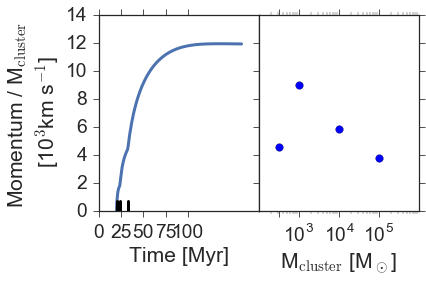

In [4]:
# left_data_dir = "../saved_runs/momentum_from_lower_density_background"
# left_id = "B1411D42-0C39-4A16-BD31-28CAD26B5C8D"

# left_data_dir = "../saved_runs/cluster_parameter_study"
# left_id = "4f206491-810e-4da9-a98d-19433981b68a"

left_data_dir = "../saved_runs/sample_mass_scaling"
left_id = "79EEEFCF-7546-4F0D-871E-58831E2BEB3A"

left_run_summary = RunSummary(data_dir=left_data_dir, id=left_id)


# right_data_dir = "../saved_runs/cluster_parameter_study"
right_data_dir = "../saved_runs/sample_mass_scaling/"
right_masses, right_momenta, right_ids = extract_masses_momenta_raw(right_data_dir, 
                                                                2.224587e-27, 
                                                                .02,
                                                                extract_at_last_SN = True)

with sns.axes_style("ticks"):
    with sns.plotting_context(context="paper", font_scale=2.4):
        f, (ax1, ax2) = plt.subplots(1,2, sharey=True)
        
        ax1.plot(left_run_summary.times / (10**6 * yr),
                 left_run_summary.momentum / (left_run_summary.overview.cluster_mass * 100 * 1000 * 1000),
                 linewidth=3)
        ax1.axes.set_xscale("linear")
#         ax1.axes.set_xbound(upper = 75)
        sns.distplot(left_run_summary.overview.SNe_times / (10**6 * yr), 
                     rug=True, hist=False, kde=False,ax=ax1, color="k", rug_kws={"linewidth":3})
        ax1.axes.set_xlabel("Time [Myr]")
        ax1.axes.set_ylabel("Momentum / M$_\mathrm{cluster}$ \n [10$^3$km s$^{-1}$]")
        ax1.xaxis.set_ticks(np.array([0,25,50,75,100]))
        
        
        ax2.scatter(right_masses / M_solar, right_momenta / (right_masses * 100 * 1000 * 1000), s=3*20)
        ax2.axes.set_xscale("log")
        ax2.axes.set_xlabel("M$_{\mathrm{cluster}} $ [M$_\odot$]")
        ax2.xaxis.set_ticks(right_masses / M_solar)

        
        plt.ylim(ymin=0)

        plt.tight_layout(w_pad=0)
#         plt.savefig("plots/NSF_momentum.eps", pad_inches=.1, bbox_inches="tight")